In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

import scipy.optimize as sci_opt
import yfinance as yf
import pandas_datareader
import datetime as dt

sns.set()

### Importing Data using yfinance - A first example

In [6]:
# Get the data for the stock AAPL
# https://towardsdatascience.com/historical-stock-price-data-in-python-a0b6dc826836
data = yf.download('AAPL','2018-04-01','2023-04-01')

[*********************100%***********************]  1 of 1 completed


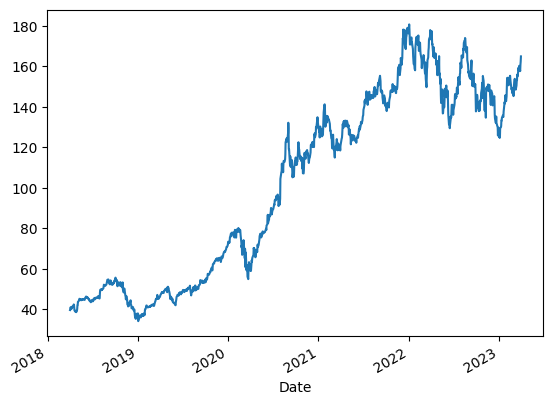

In [7]:
# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,41.660000,42.235001,41.117500,41.669998,39.724888,150347200
2018-04-03,41.910000,42.187500,41.220001,42.097500,40.132431,121112000
2018-04-04,41.220001,43.002499,41.192501,42.902500,40.899857,138422000
2018-04-05,43.145000,43.557499,43.020000,43.200001,41.183475,107732800
2018-04-06,42.742500,43.119999,42.049999,42.095001,40.130054,140021200


In [9]:
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']
data = yf.download(tickers_list,'2018-04-01','2023-04-01')['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2018-04-02 to 2023-03-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1260 non-null   float64
 1   AXP     1260 non-null   float64
 2   BA      1260 non-null   float64
 3   IBM     1260 non-null   float64
 4   MU      1260 non-null   float64
 5   WMT     1260 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


### Importing all S&P 500 Stocks

In [8]:
# Read and print the stock tickers that make up S&P500
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [24]:
# For GME, select Consumer Discretionary stocks.
tickers[tickers['GICS Sector'] == 'Consumer Discretionary']


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
9,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
25,AMZN,Amazon,Consumer Discretionary,Internet & Direct Marketing Retail,"Seattle, Washington",2005-11-18,1018724,1994
46,APTV,Aptiv,Consumer Discretionary,Automotive Parts & Equipment,"Dublin, Ireland",2012-12-24,1521332,1994
54,AZO,AutoZone,Consumer Discretionary,Specialty Stores,"Memphis, Tennessee",1997-01-02,866787,1979
60,BBWI,"Bath & Body Works, Inc.",Consumer Discretionary,Specialty Stores,"Columbus, Ohio",1983-09-30,701985,1963
65,BBY,Best Buy,Consumer Discretionary,Computer & Electronics Retail,"Richfield, Minnesota",1999-06-29,764478,1966
72,BKNG,Booking Holdings,Consumer Discretionary,Internet & Direct Marketing Retail,"Norwalk, Connecticut",2009-11-06,1075531,1996
73,BWA,BorgWarner,Consumer Discretionary,Automotive Parts & Equipment,"Auburn Hills, Michigan",2011-12-19,908255,1880
84,CZR,Caesars Entertainment,Consumer Discretionary,Casinos & Gaming,"Reno, Nevada",2021-03-22,1590895,1973
89,KMX,CarMax,Consumer Discretionary,Automotive Retail,"Richmond, Virginia",2010-06-28,1170010,1993


In [28]:
pandas_datareader.data.get_quote_yahoo('AAPL')['marketCap']

AAPL    2610929860608
Name: marketCap, dtype: int64

In [9]:
# Get the data for this tickers from yahoo finance
data = yf.download(tickers.Symbol.to_list(),'2018-03-01','2023-03-01', auto_adjust=True)['Close']

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [12]:
data.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,64.777748,52.225384,109.104607,41.707802,89.223457,86.060631,53.893341,28.750000,144.118408,206.029999,...,154.374451,37.181393,57.966061,52.590572,68.992859,72.940781,105.861198,140.679993,47.245155,77.777229
2018-03-02 00:00:00,64.902725,51.932423,107.767593,41.996185,90.163979,86.669411,54.507534,28.713333,145.364380,209.789993,...,154.034378,37.060818,58.235867,54.179028,69.218826,73.480751,109.124207,135.449997,47.618740,78.589432
2018-03-05 00:00:00,64.941154,51.942188,108.036850,42.141560,90.649902,87.536499,55.341743,29.713333,146.610367,211.160004,...,155.923660,37.749840,58.790859,53.132732,69.548439,73.791916,110.131073,141.020004,48.400661,79.179222
2018-03-06 00:00:00,65.479561,52.313274,110.107346,42.105816,89.787758,87.351997,55.809277,30.016666,145.853592,212.009995,...,157.548462,36.957458,58.721474,53.617825,70.885506,74.478294,110.093758,143.220001,49.121758,78.811813
2018-03-07 00:00:00,67.008133,52.840607,108.417511,41.714939,89.913170,88.182167,56.185108,29.886667,146.333496,216.860001,...,159.088242,36.793823,57.241497,53.674904,71.921310,74.505753,112.806732,143.979996,49.460587,79.053520


In [14]:
data.to_csv('AllSP500.csv')

### GME data Outliers

In [6]:
# Get the data for this tickers from yahoo finance
gme = yf.download(['GME', 'JPM', 'SPY'],'2018-03-01','2023-03-01', auto_adjust=True)['Close']
gme.head()

[*********************100%***********************]  3 of 3 completed


,GME,JPM,SPY
Date,,,
2018-03-01,3.488268,97.150383,244.849808
2018-03-02,3.564343,97.056175,246.111969
2018-03-05,3.591193,98.546440,248.956528
2018-03-06,3.593431,98.632080,249.587601
2018-03-07,3.566580,98.263824,249.496185


In [7]:
# Get the data for this tickers from yahoo finance
gme1 = yf.download('GME','2018-03-01','2023-03-01', auto_adjust=True)['Close']
gme1.head()

[*********************100%***********************]  1 of 1 completed


Date
2018-03-01    3.488268
2018-03-02    3.564343
2018-03-05    3.591193
2018-03-06    3.593430
2018-03-07    3.566580
Name: Close, dtype: float64

In [4]:
gme2 = gme1.reset_index()
gme2[720:760]

,Date,Close
720,2021-01-08,4.422500
721,2021-01-11,4.985000
722,2021-01-12,4.987500
723,2021-01-13,7.850000
724,2021-01-14,9.977500
725,2021-01-15,8.875000
726,2021-01-19,9.840000
727,2021-01-20,9.780000
728,2021-01-21,10.757500
729,2021-01-22,16.252501


Text(0.5, 0, 'Date')

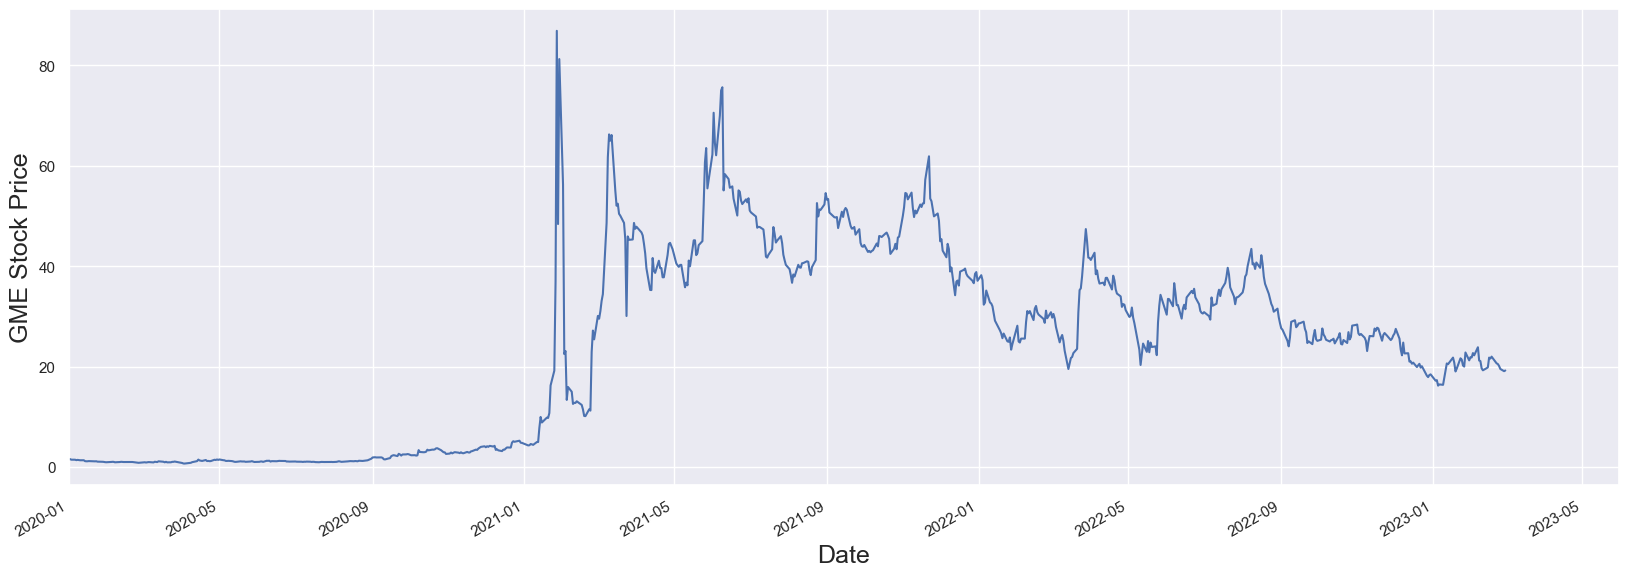

In [5]:
# Scatter plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,7))  

gme1.plot(ax=ax)

ax.set_xlim(left = dt.datetime(2020, 1, 1))
ax.set_ylabel('GME Stock Price', fontsize = 18)
ax.set_xlabel('Date', fontsize = 18)

In [8]:
gme_returns = gme.pct_change()[1:]
gme_returns.head()

,GME,JPM,SPY
Date,,,
2018-03-02,0.021809,-0.000970,0.005155
2018-03-05,0.007533,0.015355,0.011558
2018-03-06,0.000623,0.000869,0.002535
2018-03-07,-0.007472,-0.003734,-0.000366
2018-03-08,-0.018820,0.000087,0.004839


<Axes: xlabel='Date'>

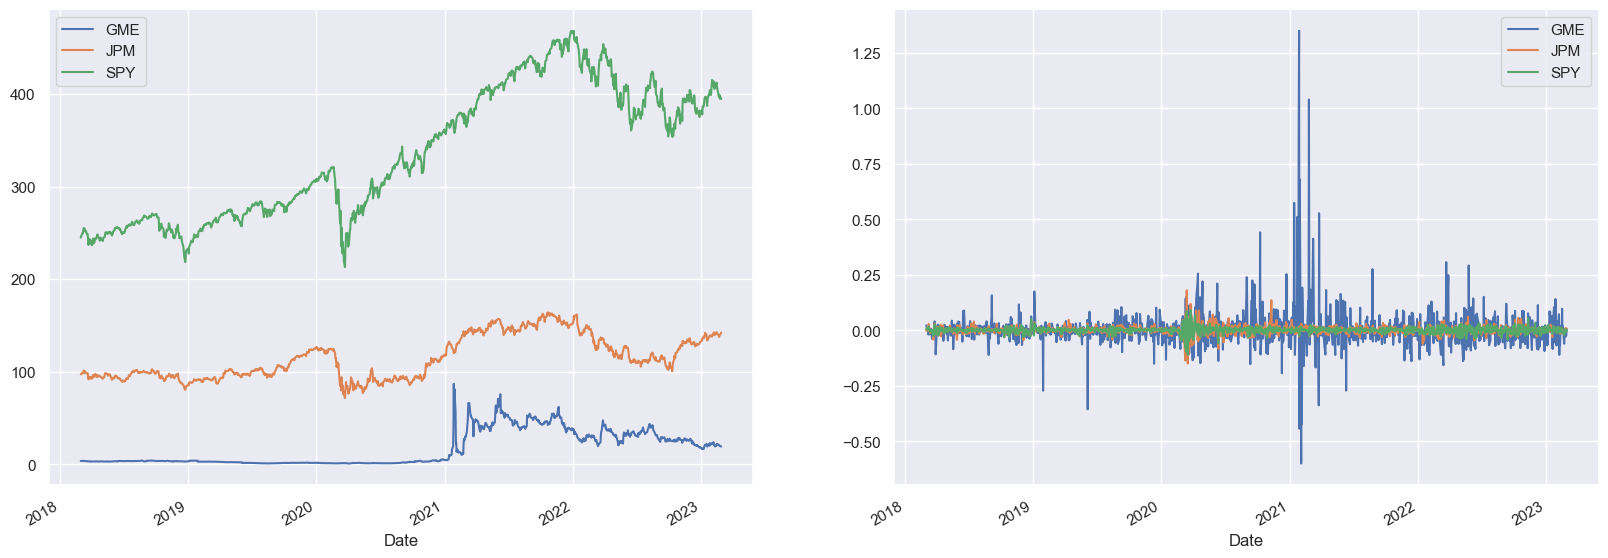

In [21]:
# Scatter plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))  

gme.plot(ax=ax[0])
gme_returns.plot(ax=ax[1])

In [9]:
X1, Y1 = gme_returns['SPY'], gme_returns['GME']
X1_c = sm.add_constant(X1)
result = sm.OLS(Y1, X1_c).fit()

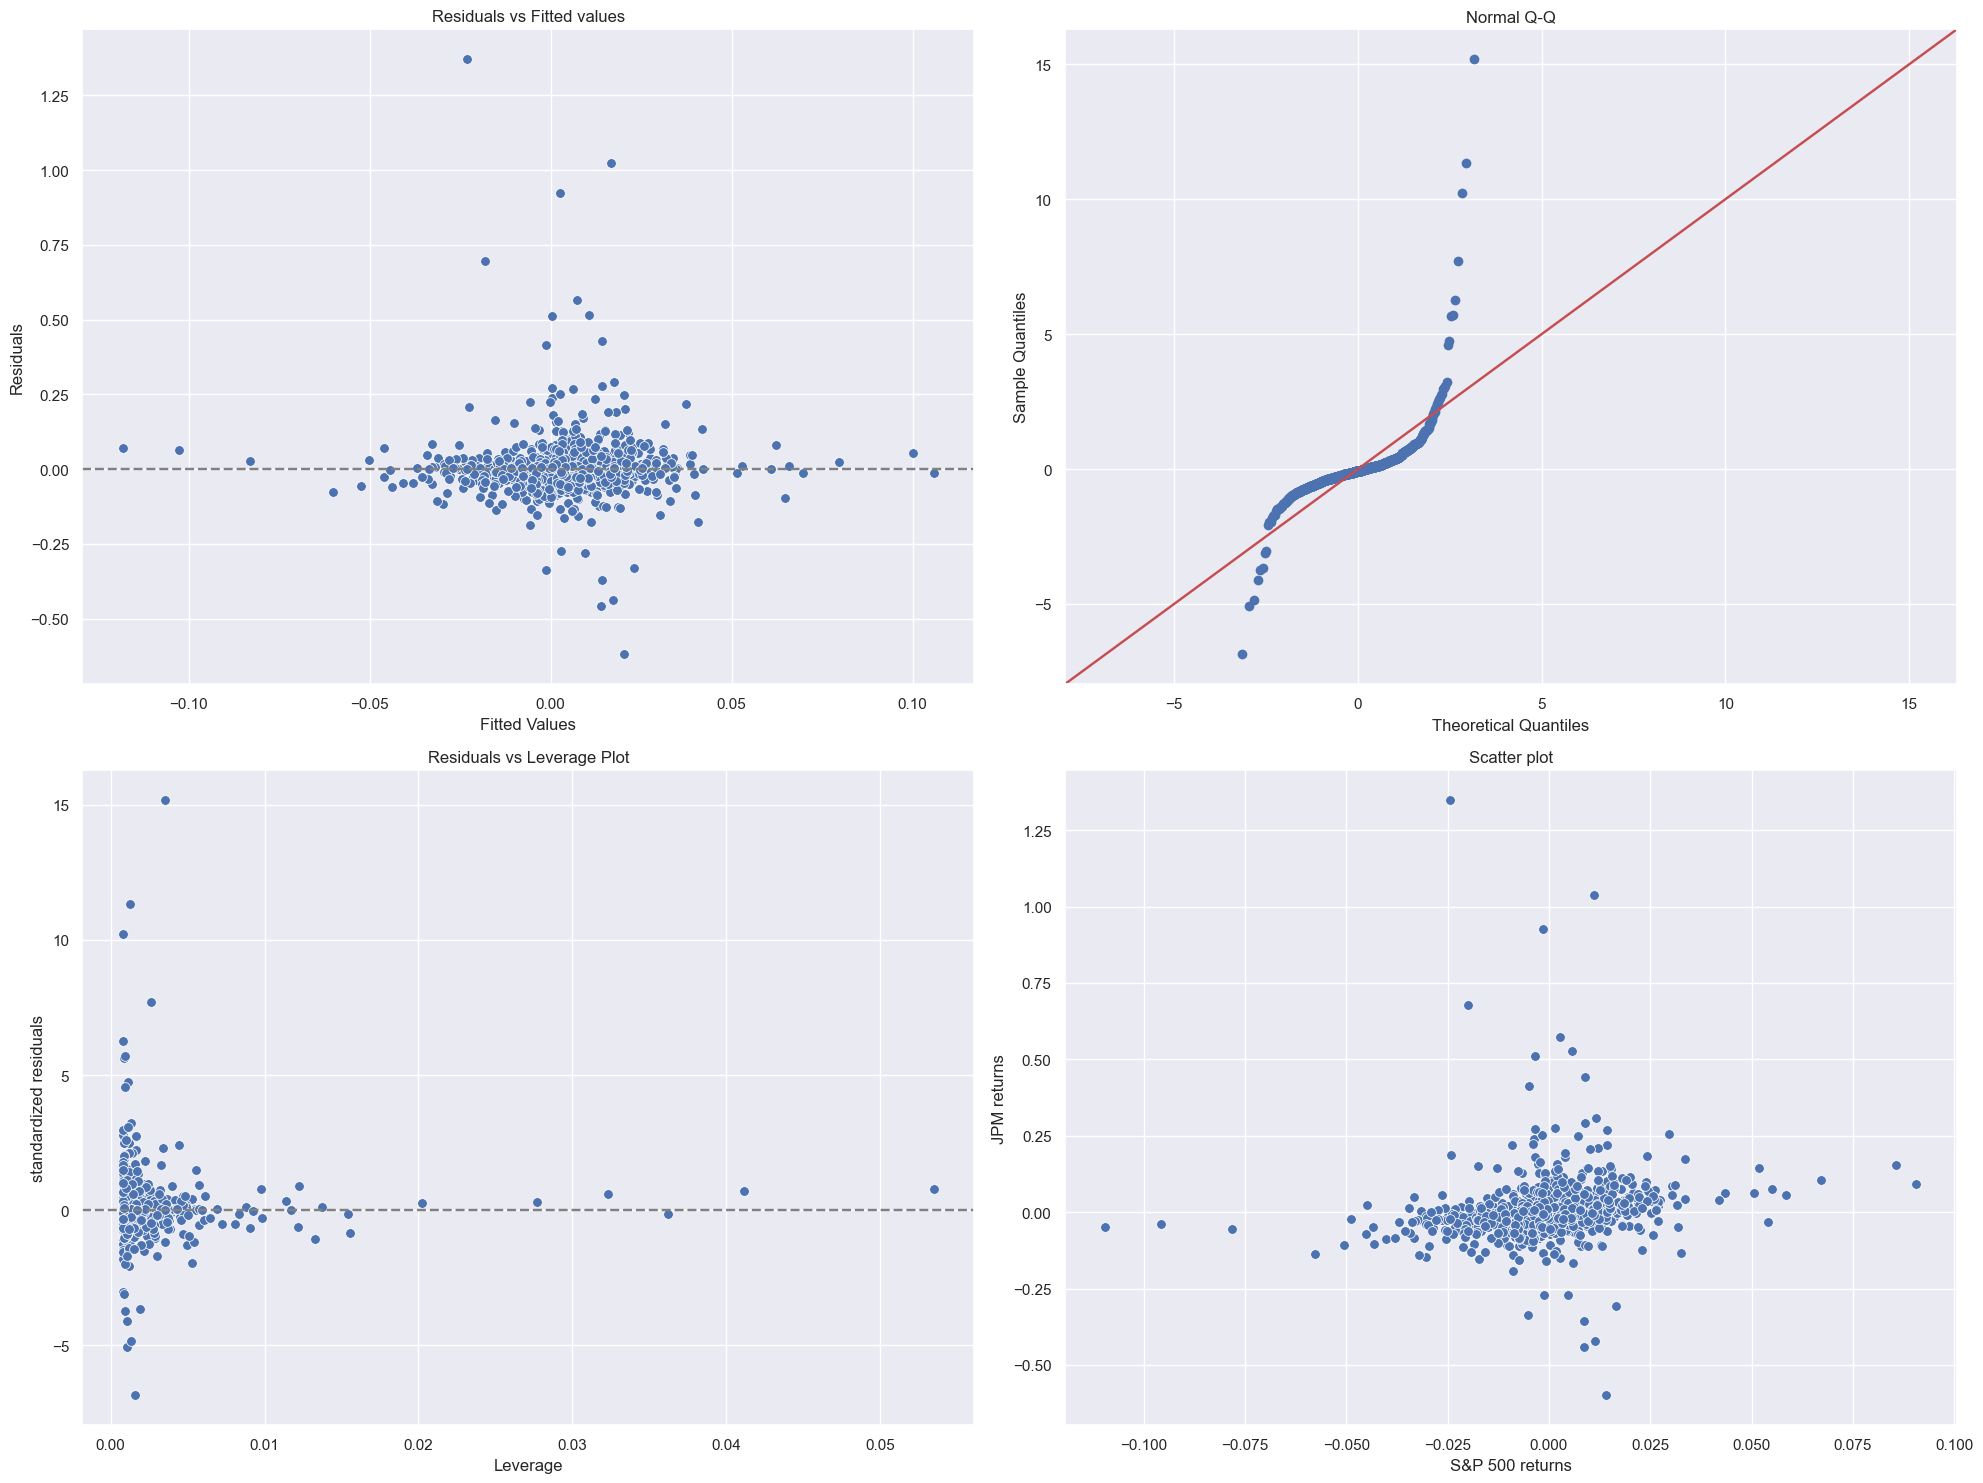

In [23]:
# Get different Variables for diagnostic
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
influence = result.get_influence()
leverage = influence.hat_matrix_diag
  
# PLot different diagnostic plots
#plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))  
plt.style.use('seaborn')
  
# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_title('Residuals vs Fitted values')
  
# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q')
  
 
# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Leverage')
ax[1, 0].set_ylabel('standardized residuals')
ax[1, 0].set_title('Residuals vs Leverage Plot')

# Scatter plot
sns.scatterplot(x=X1, y=Y1, ax=ax[1, 1])
ax[1, 1].set_xlabel('S&P 500 returns')
ax[1, 1].set_ylabel('JPM returns')
ax[1, 1].set_title('Scatter plot')
  

plt.tight_layout()
plt.show()

- We see that the CAPM is not a great model for the daily returns. Try instead using monthly returns.

In [10]:
monthly_return = gme.resample('M').ffill().pct_change()
monthly_return = monthly_return.dropna(axis=0)
monthly_return.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2018-04-30 to 2023-02-28
Freq: M
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GME     59 non-null     float64
 1   JPM     59 non-null     float64
 2   SPY     59 non-null     float64
dtypes: float64(3)
memory usage: 1.8 KB


<Axes: xlabel='Date'>

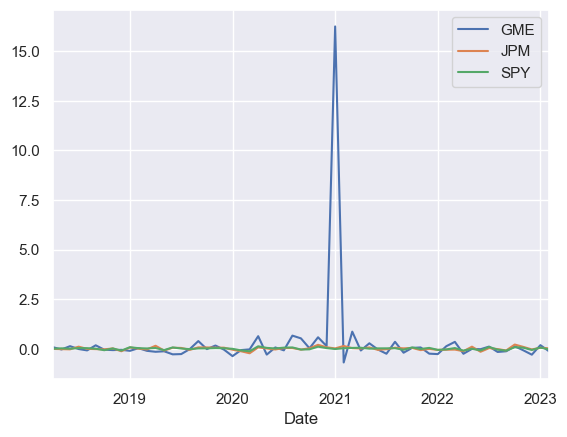

In [11]:
monthly_return.plot()

In [9]:
X1, Y1 = monthly_return['SPY'], monthly_return['GME'] # dependent variable

# When using statsmodel, you should add an intercept
X1_c = sm.add_constant(X1)
result = sm.OLS(Y1, X1_c).fit()

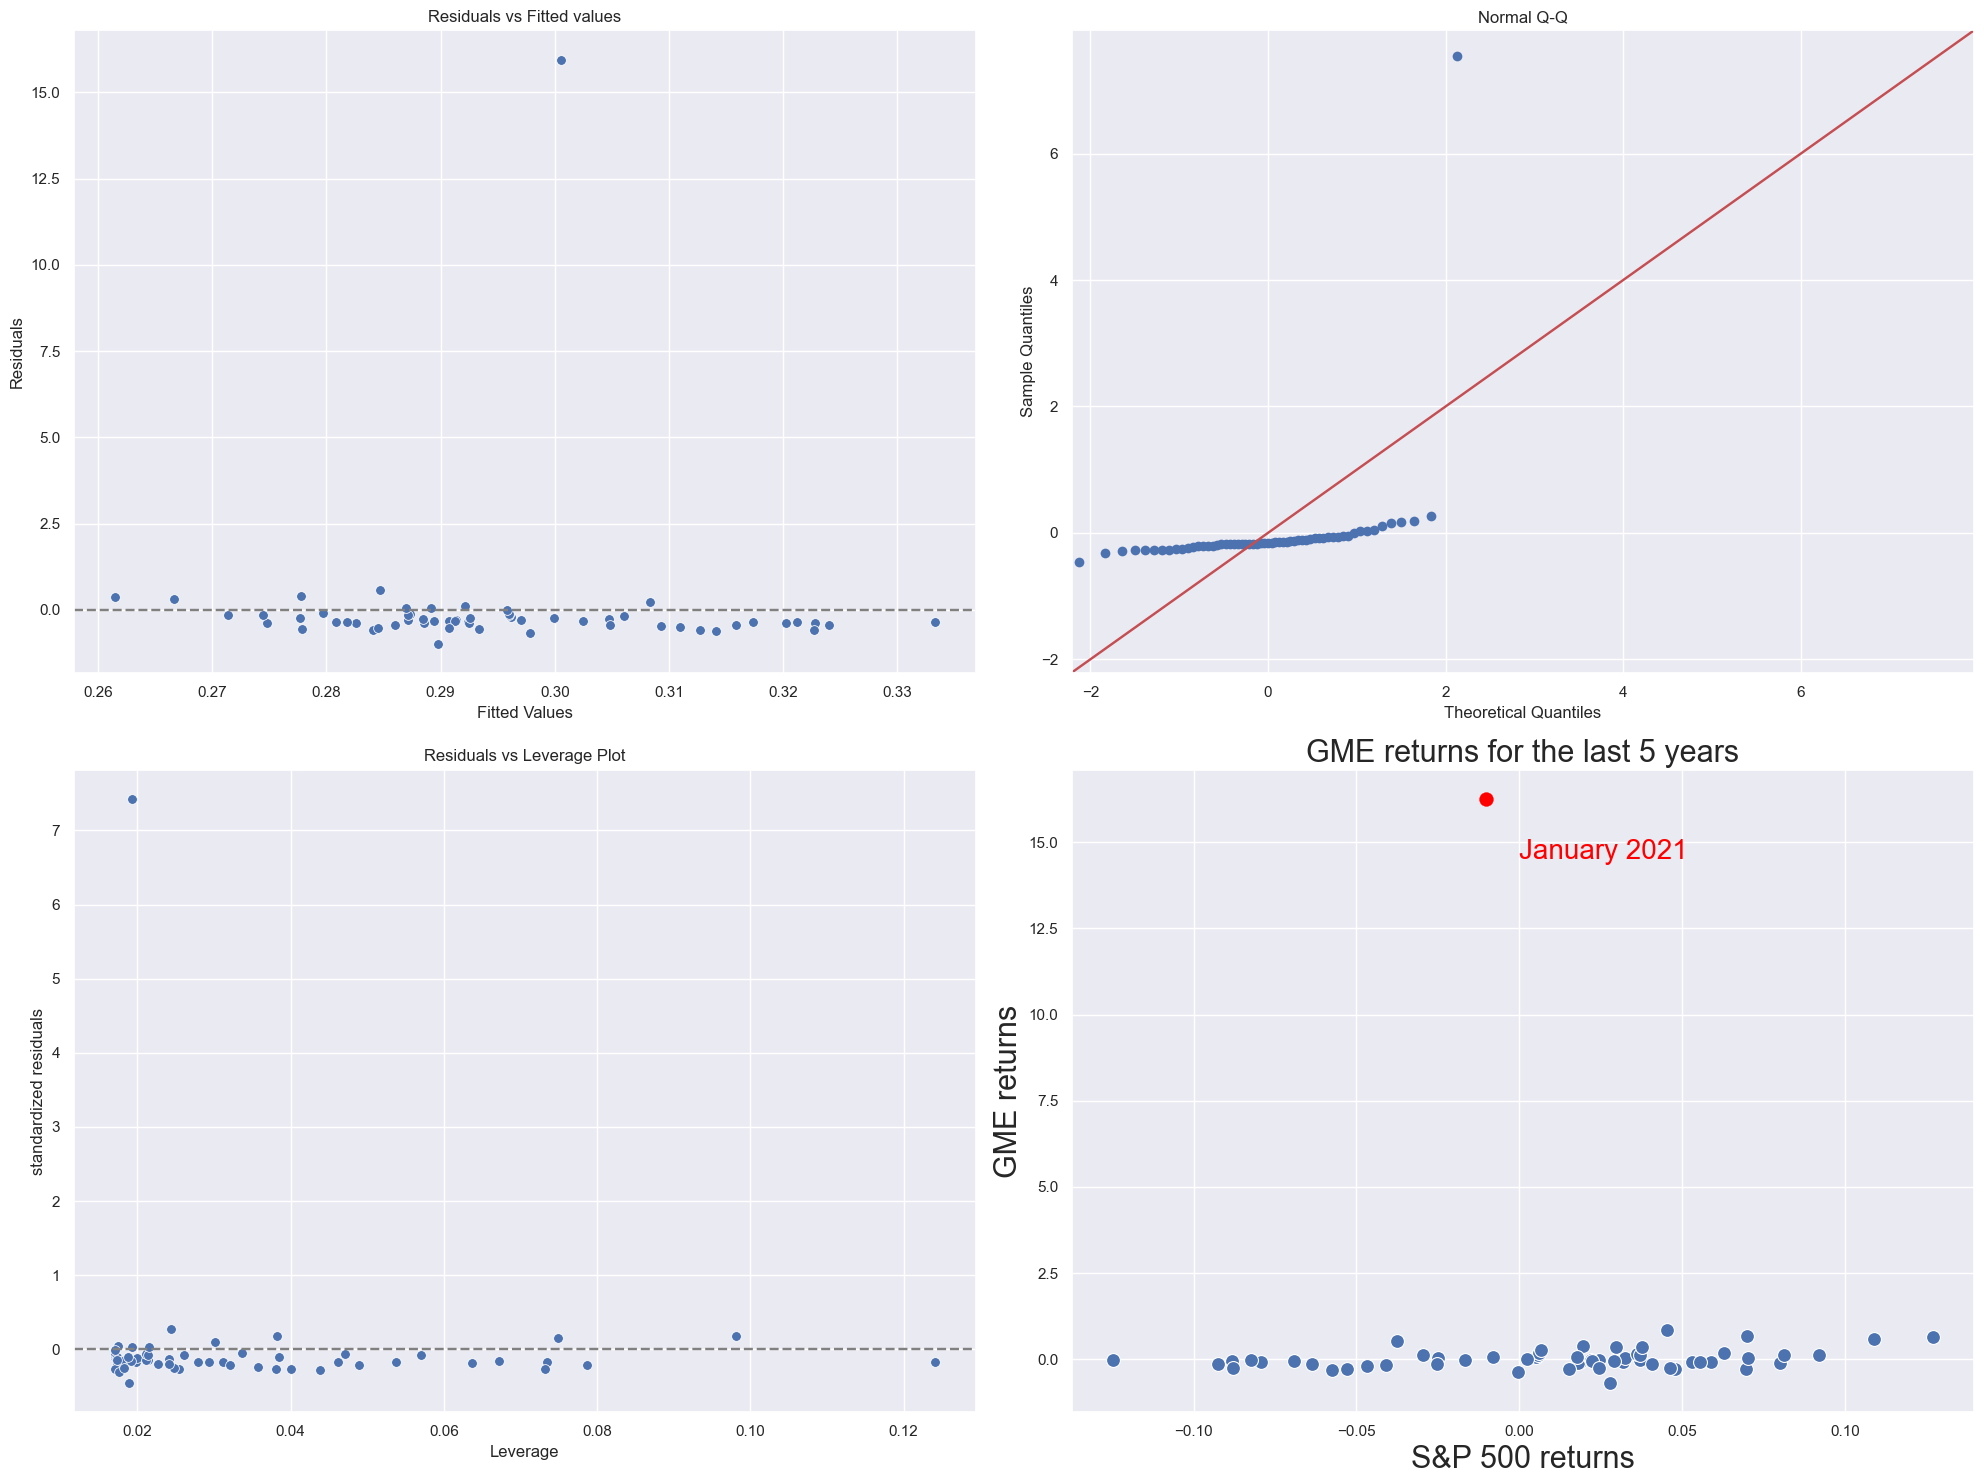

In [10]:
# Get different Variables for diagnostic
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
influence = result.get_influence()
leverage = influence.hat_matrix_diag
  
# PLot different diagnostic plots
#plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))  
plt.style.use('seaborn')
  
# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_title('Residuals vs Fitted values')
  
# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q')
  
 
# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Leverage')
ax[1, 0].set_ylabel('standardized residuals')
ax[1, 0].set_title('Residuals vs Leverage Plot')

# Scatter plot
sns.scatterplot(x=X1, y=Y1, ax=ax[1, 1], s=100)
ax[1, 1].set_xlabel('S&P 500 returns', fontsize = 22)
ax[1, 1].set_ylabel('GME returns', fontsize = 22)
ax[1, 1].set_title('GME returns for the last 5 years', fontsize = 22)

plt.scatter(X1[33], Y1[33], c="red", s=100)
plt.text(0, 14.5, 'January 2021', fontsize = 20, c="red")
  

plt.tight_layout()
plt.show()

In [22]:
print([X1[33], Y1[33]])

[-0.010190351806128595, 16.250530645848084]


In [ ]:
pd.DataFrame([{'S&P 500 Returns': X1, 'GME Returns': Y1, 'Hue':}])
sns.scatterplot(x=X1, y=Y1, ax=ax[1, 1], s=100)

In [154]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GME   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                  0.002983
Date:                Mon, 24 Apr 2023   Prob (F-statistic):              0.957
Time:                        11:50:31   Log-Likelihood:                -127.83
No. Observations:                  59   AIC:                             259.7
Df Residuals:                      57   BIC:                             263.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2977      0.284      1.047      0.300      -0.272       0.867
SPY           -0.2853      5.223     -0.055      0.957     -10.745      10.174
==============================================================================
Omnibus:                      128.368   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7201.771
Skew:                           7.292   Prob(JB):                         0.00
Kurtosis:                      55.123   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- So we see that GME has a ridiculous outlier even in monthly returns. Note that if we eliminate this outlier, we get the following beta:

In [29]:
c = 7
print(np.count_nonzero(stand_resids >= c)+np.count_nonzero(stand_resids <= -c))
print(np.where(stand_resids >= c), np.where(stand_resids <= -c))
np.extract(stand_resids >= c, stand_resids)[:]

1
(array([33], dtype=int64),) (array([], dtype=int64),)


array([7.4225551])

In [91]:
monthly_return.head(34)

,GME,JPM,SPY
Date,,,
2018-04-30,0.081616,-0.005805,0.005168
2018-05-31,-0.032967,-0.016271,0.024309
2018-06-30,0.133430,-0.026259,0.005751
2018-07-31,-0.010981,0.109162,0.037047
2018-08-31,-0.079112,-0.003219,0.031920
2018-09-30,0.177363,-0.015186,0.005946
2018-10-31,-0.043877,-0.027088,-0.069104
2018-11-30,-0.064384,0.019905,0.018549
2018-12-31,-0.049739,-0.122043,-0.088048


In [92]:
dropped_outlier_gme = monthly_return.drop(['2021-01-31'])
dropped_outlier_gme.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 2018-04-30 to 2023-02-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GME     58 non-null     float64
 1   JPM     58 non-null     float64
 2   SPY     58 non-null     float64
dtypes: float64(3)
memory usage: 1.8 KB


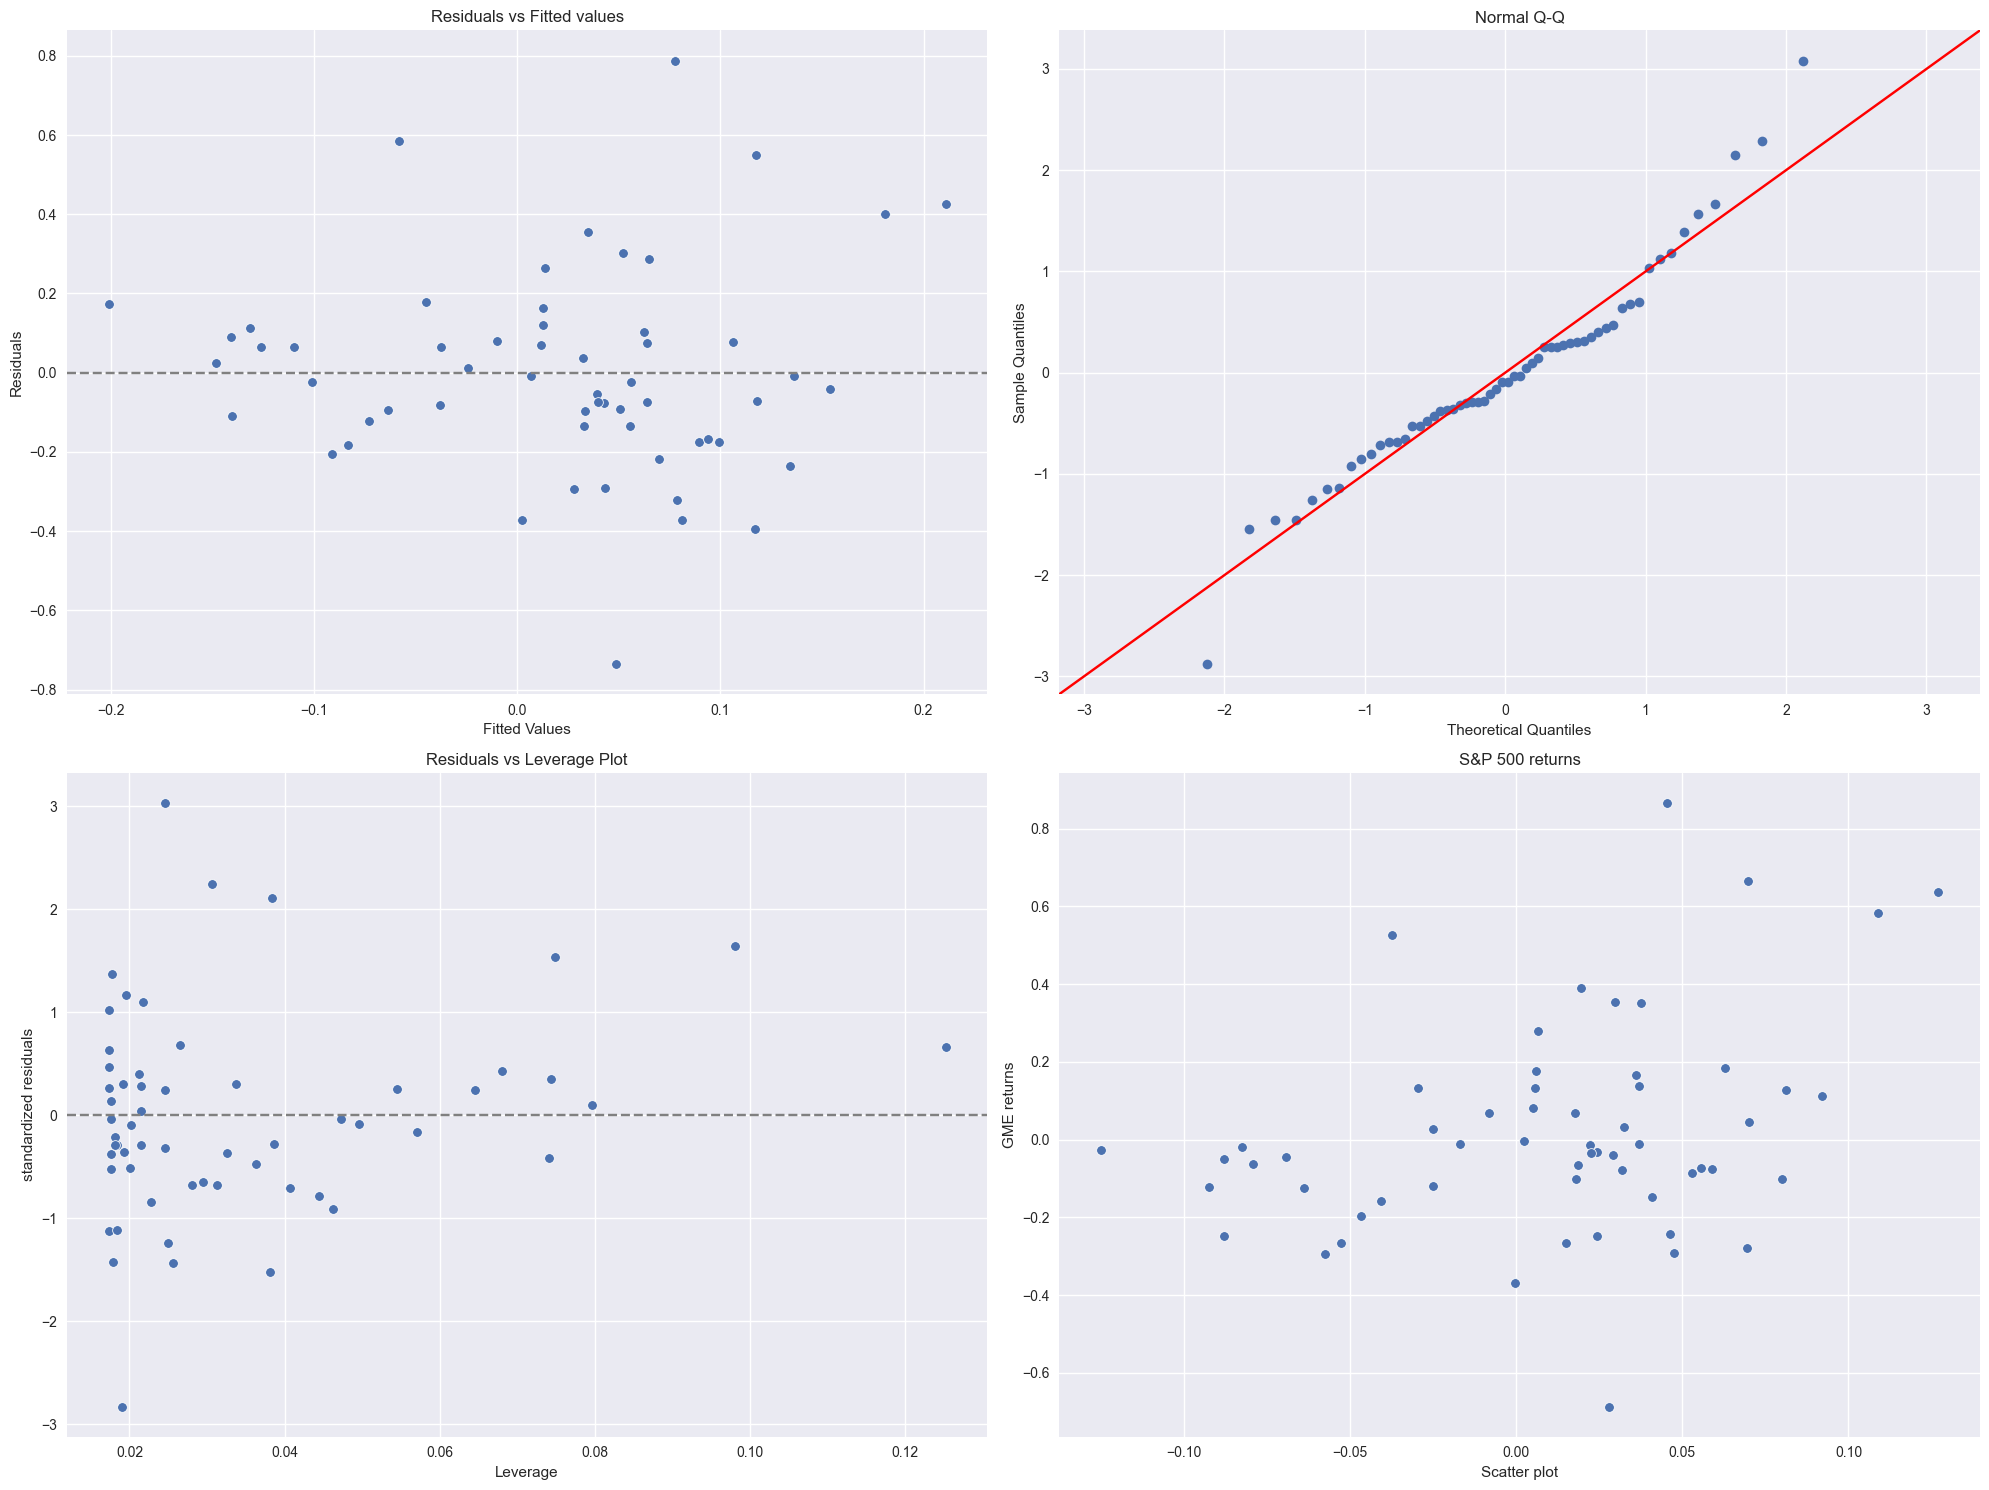

In [93]:
X1, Y1 = dropped_outlier_gme['SPY'], dropped_outlier_gme['GME'] # dependent variable

# When using statsmodel, you should add an intercept
X1_c = sm.add_constant(X1)
result = sm.OLS(Y1, X1_c).fit()

# Get different Variables for diagnostic
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
influence = result.get_influence()
leverage = influence.hat_matrix_diag
  
# PLot different diagnostic plots
#plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))  
plt.style.use('seaborn')
  
# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_title('Residuals vs Fitted values')
  
# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q')
  
 
# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Leverage')
ax[1, 0].set_ylabel('standardized residuals')
ax[1, 0].set_title('Residuals vs Leverage Plot')

# Scatter plot
sns.scatterplot(x=X1, y=Y1, ax=ax[1, 1])
ax[1, 1].set_xlabel('Scatter plot')
ax[1, 1].set_ylabel('GME returns')
ax[1, 1].set_title('S&P 500 returns')


  

plt.tight_layout()
plt.show()

In [94]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GME   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     6.672
Date:                Mon, 24 Apr 2023   Prob (F-statistic):             0.0124
Time:                        10:50:35   Log-Likelihood:                -3.1874
No. Observations:                  58   AIC:                             10.37
Df Residuals:                      56   BIC:                             14.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.035      0.092      0.927      -0.066       0.073
SPY            1.6355      0.633      2.583      0.012       0.367       2.904
==============================================================================
Omnibus:                        6.196   Durbin-Watson:                   2.314
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                6.433
Skew:                           0.435   Prob(JB):                       0.0401
Kurtosis:                       4.380   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
pandas_datareader.data.get_quote_yahoo(['AAPL','GME'])['marketCap']

AAPL    2610929860608
GME        6242790912
Name: marketCap, dtype: int64

### Import Data from saved file
(to avoid waiting at a later stage)

In [30]:
df = pd.read_csv('AllSP500.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Columns: 502 entries, Date to ZTS
dtypes: float64(501), object(1)
memory usage: 4.8+ MB


In [31]:
#df = df.set_index('Date')
df.head()

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,01/03/2018,64.777748,52.225384,109.104607,41.707802,89.223457,86.060631,53.893341,28.750000,144.118408,...,154.374451,37.181393,57.966061,52.590572,68.992859,72.940781,105.861198,140.679993,47.245155,77.777229
1,02/03/2018,64.902725,51.932423,107.767593,41.996185,90.163979,86.669411,54.507534,28.713333,145.364380,...,154.034378,37.060818,58.235867,54.179028,69.218826,73.480751,109.124206,135.449997,47.618740,78.589432
2,05/03/2018,64.941154,51.942188,108.036850,42.141560,90.649902,87.536499,55.341743,29.713333,146.610367,...,155.923660,37.749840,58.790859,53.132732,69.548439,73.791916,110.131073,141.020004,48.400661,79.179222
3,06/03/2018,65.479561,52.313274,110.107346,42.105816,89.787758,87.351997,55.809277,30.016666,145.853592,...,157.548462,36.957459,58.721474,53.617825,70.885506,74.478294,110.093758,143.220001,49.121758,78.811813
4,07/03/2018,67.008133,52.840607,108.417511,41.714939,89.913170,88.182167,56.185108,29.886667,146.333496,...,159.088242,36.793823,57.241497,53.674904,71.921310,74.505753,112.806732,143.979996,49.460587,79.053520


In [ ]:
df.pct_change()

### How do GME outliers compare to other S&P 500 stocks?

- To answer this question, we need to compute the beta for all stocks and look at the standardized residuals. Let us look for values >= 5 to begin with.

In [60]:
df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-01,64.777748,52.225384,109.104607,41.707802,89.223457,86.060631,53.893341,28.750000,144.118408,206.029999,...,154.374451,37.181393,57.966061,52.590572,68.992859,72.940781,105.861198,140.679993,47.245155,77.777229
2018-03-02,64.902725,51.932423,107.767593,41.996185,90.163979,86.669411,54.507534,28.713333,145.364380,209.789993,...,154.034378,37.060818,58.235867,54.179028,69.218826,73.480751,109.124206,135.449997,47.618740,78.589432
2018-03-05,64.941154,51.942188,108.036850,42.141560,90.649902,87.536499,55.341743,29.713333,146.610367,211.160004,...,155.923660,37.749840,58.790859,53.132732,69.548439,73.791916,110.131073,141.020004,48.400661,79.179222
2018-03-06,65.479561,52.313274,110.107346,42.105816,89.787758,87.351997,55.809277,30.016666,145.853592,212.009995,...,157.548462,36.957459,58.721474,53.617825,70.885506,74.478294,110.093758,143.220001,49.121758,78.811813
2018-03-07,67.008133,52.840607,108.417511,41.714939,89.913170,88.182167,56.185108,29.886667,146.333496,216.860001,...,159.088242,36.793823,57.241497,53.674904,71.921310,74.505753,112.806732,143.979996,49.460587,79.053520


In [33]:
df.Date = pd.to_datetime(df.Date, format='%d/%m/%Y') # convert 'date' to actual date
df = df.set_index('Date')

In [34]:
df_monthly_return = df.resample('M').ffill().pct_change()[1:]
# df_monthly_return = df_monthly_return.dropna(axis=0)
df_monthly_return.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2018-04-30 to 2023-02-28
Freq: M
Columns: 501 entries, A to ZTS
dtypes: float64(501)
memory usage: 231.4 KB


In [35]:
df_monthly_return.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-30,-0.015146,-0.173787,-0.034585,-0.015019,0.030640,0.050690,-0.025203,-0.063793,-0.006292,0.025546,...,0.021002,0.029903,0.042085,0.000596,-0.052262,0.023141,0.056218,-0.031324,0.038308,0.001108
2018-05-31,-0.058108,0.016581,0.123809,0.135124,0.024754,-0.089202,0.058489,-0.020966,0.030027,0.124910,...,0.056894,-0.028181,0.055478,-0.129718,-0.031473,-0.062207,-0.031779,0.138545,0.005268,0.002635
2018-06-30,-0.001292,-0.128158,0.055501,-0.009418,-0.063574,0.038106,-0.008776,0.011855,0.050405,-0.021943,...,-0.146268,0.012569,0.018341,0.001091,-0.042898,-0.038239,0.001556,-0.066836,-0.038679,0.017802
2018-07-31,0.070497,0.041623,0.040751,0.027983,0.005633,-0.040343,0.079433,0.154951,-0.026041,0.003568,...,-0.003347,0.025832,-0.014747,0.099154,0.136243,0.013679,0.126346,-0.037138,-0.018789,0.016633
2018-08-31,0.022714,0.026445,0.161438,0.200422,0.040659,0.104308,0.019835,0.000327,0.061131,0.076958,...,-0.105904,0.025395,-0.006295,-0.170235,-0.005758,0.100556,-0.015057,0.245124,0.036559,0.047641


In [216]:
test = pd.DataFrame()
test['col1'] = [1]
test['col2'] = [1]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col1    1 non-null      int64
 1   col2    1 non-null      int64
dtypes: int64(2)
memory usage: 144.0 bytes


In [42]:
df_outliers = pd.DataFrame()
df_outliers_neg = pd.DataFrame()
df_dates_outliers = pd.DataFrame()
X = monthly_return['SPY']
X_c = sm.add_constant(X)

v = 3

for tick in df.columns:
    Y = df_monthly_return[tick]
    result = sm.OLS(Y, X_c).fit()
    stand_resids = result.resid_pearson
    
    if np.count_nonzero(stand_resids >= v) > 0:
        df_outliers[tick] = [np.where(stand_resids >= v)[0][0], np.extract(stand_resids >= v, stand_resids)[0]]
    
    if np.count_nonzero(stand_resids <= -v) > 0:
        df_outliers_neg[tick] = [np.where(stand_resids <= -v)[0][0], np.extract(stand_resids <= -v, stand_resids)[0]]


In [43]:
df_outliers

,AEE,AFL,AJG,ALB,ALK,ANSS,APA,APD,ATO,BBWI,...,TT,UDR,UNP,VRSK,WBA,WBD,WM,WMB,WY,XOM
0,35.00000,31.000000,25.000000,49.000000,34.000000,58.000000,24.000000,55.000000,35.00000,27.000000,...,27.000000,31.000000,42.000000,47.000000,33.000000,57.000000,35.000000,24.000000,48.000000,45.000000
1,3.02269,3.617525,3.098961,3.023109,3.356889,3.052805,5.917207,3.230597,3.01276,3.307381,...,3.617888,3.059608,3.315686,3.072269,3.401924,3.409841,3.159163,3.034323,3.214281,3.579409


In [44]:
df_outliers_neg

,AAP,AAPL,ACGL,ADBE,ADP,AIG,ATVI,AVB,BDX,CAG,...,TGT,TMO,TRGP,ULTA,VICI,VRTX,VTR,VTRS,WELL,WMT
0,55.000000,7.000000,24.000000,44.000000,27.000000,23.000000,7.000000,23.000000,28.000000,8.00000,...,49.000000,34.000000,23.000000,16.000000,23.000000,30.000000,23.000000,13.000000,23.000000,49.00000
1,-3.313328,-3.437854,-3.568183,-3.522652,-3.215371,-3.311604,-3.440676,-3.074637,-3.212776,-3.58943,...,-3.699377,-3.049135,-3.356957,-3.407087,-4.050713,-3.052587,-4.020525,-3.055267,-3.639214,-3.47595


In [268]:
df_outliers.columns

Index(['AEE', 'AFL', 'AJG', 'ALB', 'ALK', 'ANSS', 'APA', 'APD', 'ATO', 'BBWI',
       'BG', 'BIIB', 'BR', 'BXP', 'CAT', 'CBOE', 'CBRE', 'CCL', 'CDW', 'CHD',
       'CMG', 'CPB', 'CRM', 'CTRA', 'CZR', 'DGX', 'DLR', 'DOV', 'DPZ', 'DVN',
       'DXCM', 'EOG', 'EQIX', 'EQT', 'FCX', 'FRC', 'GILD', 'GRMN', 'HAL',
       'HIG', 'HOLX', 'HRL', 'ICE', 'IQV', 'ISRG', 'IVZ', 'KDP', 'KIM', 'KMB',
       'LHX', 'LKQ', 'LMT', 'LUV', 'LVS', 'LYV', 'MOH', 'MOS', 'MRO', 'MSI',
       'NOC', 'NRG', 'NUE', 'NWL', 'OMC', 'ORCL', 'OXY', 'PAYC', 'PFE', 'PODD',
       'POOL', 'QCOM', 'QRVO', 'REGN', 'RTX', 'SHW', 'SLB', 'STLD', 'TGT',
       'TPR', 'TRGP', 'TT', 'UDR', 'UNP', 'VRSK', 'WBA', 'WBD', 'WM', 'WMB',
       'WY', 'XOM'],
      dtype='object')

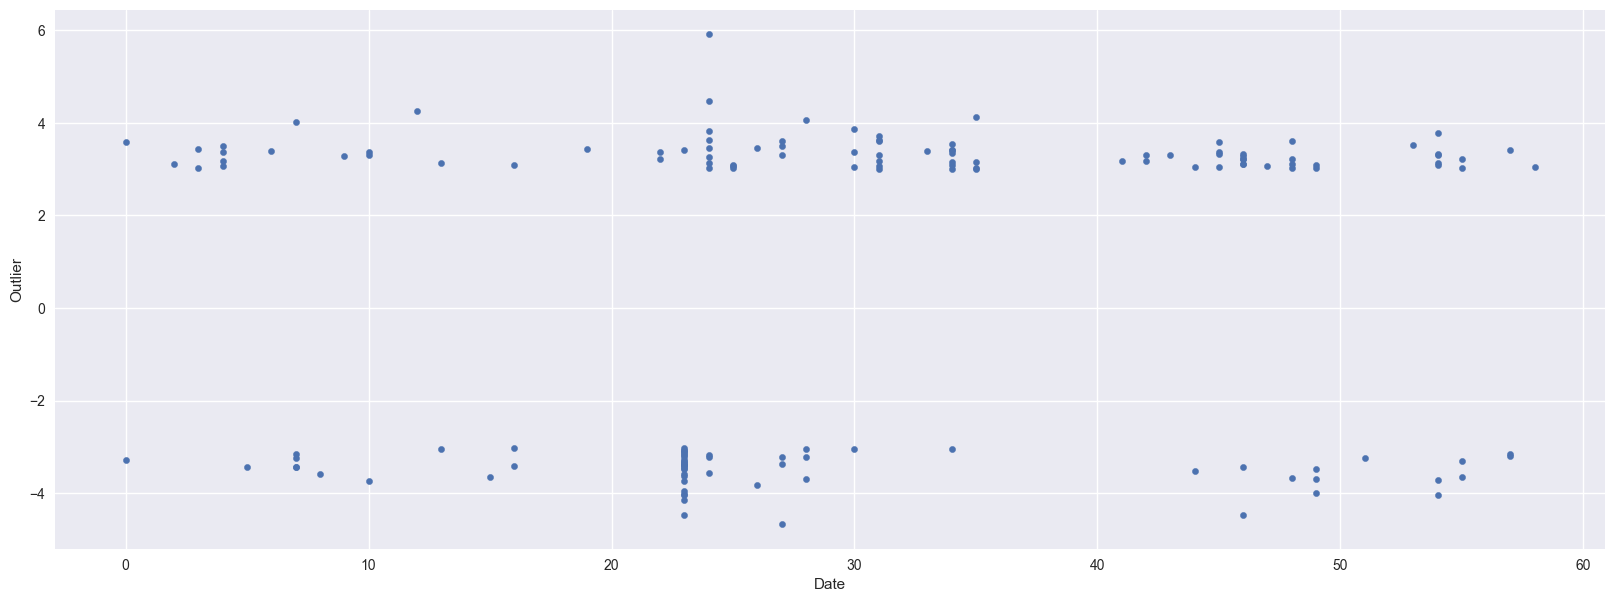

In [45]:
df1_transposed = df_outliers.T
df1_neg_transposed = df_outliers_neg.T

df1_transposed = df1_transposed.rename(columns={0: "Date", 1: "Outlier"})
df1_neg_transposed = df1_neg_transposed.rename(columns={0: "Date", 1: "Outlier"})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,7))  

df1_transposed.plot.scatter(ax=ax, x='Date', y='Outlier')
df1_neg_transposed.plot.scatter(ax=ax, x='Date', y='Outlier')

plt.show()

In [240]:
df1_transposed[df1_transposed['Outlier'] > 4.5]
# Date: 2020-04-30
# monthly_return.head(25)

,Date,Outlier
APA,24.0,5.917209


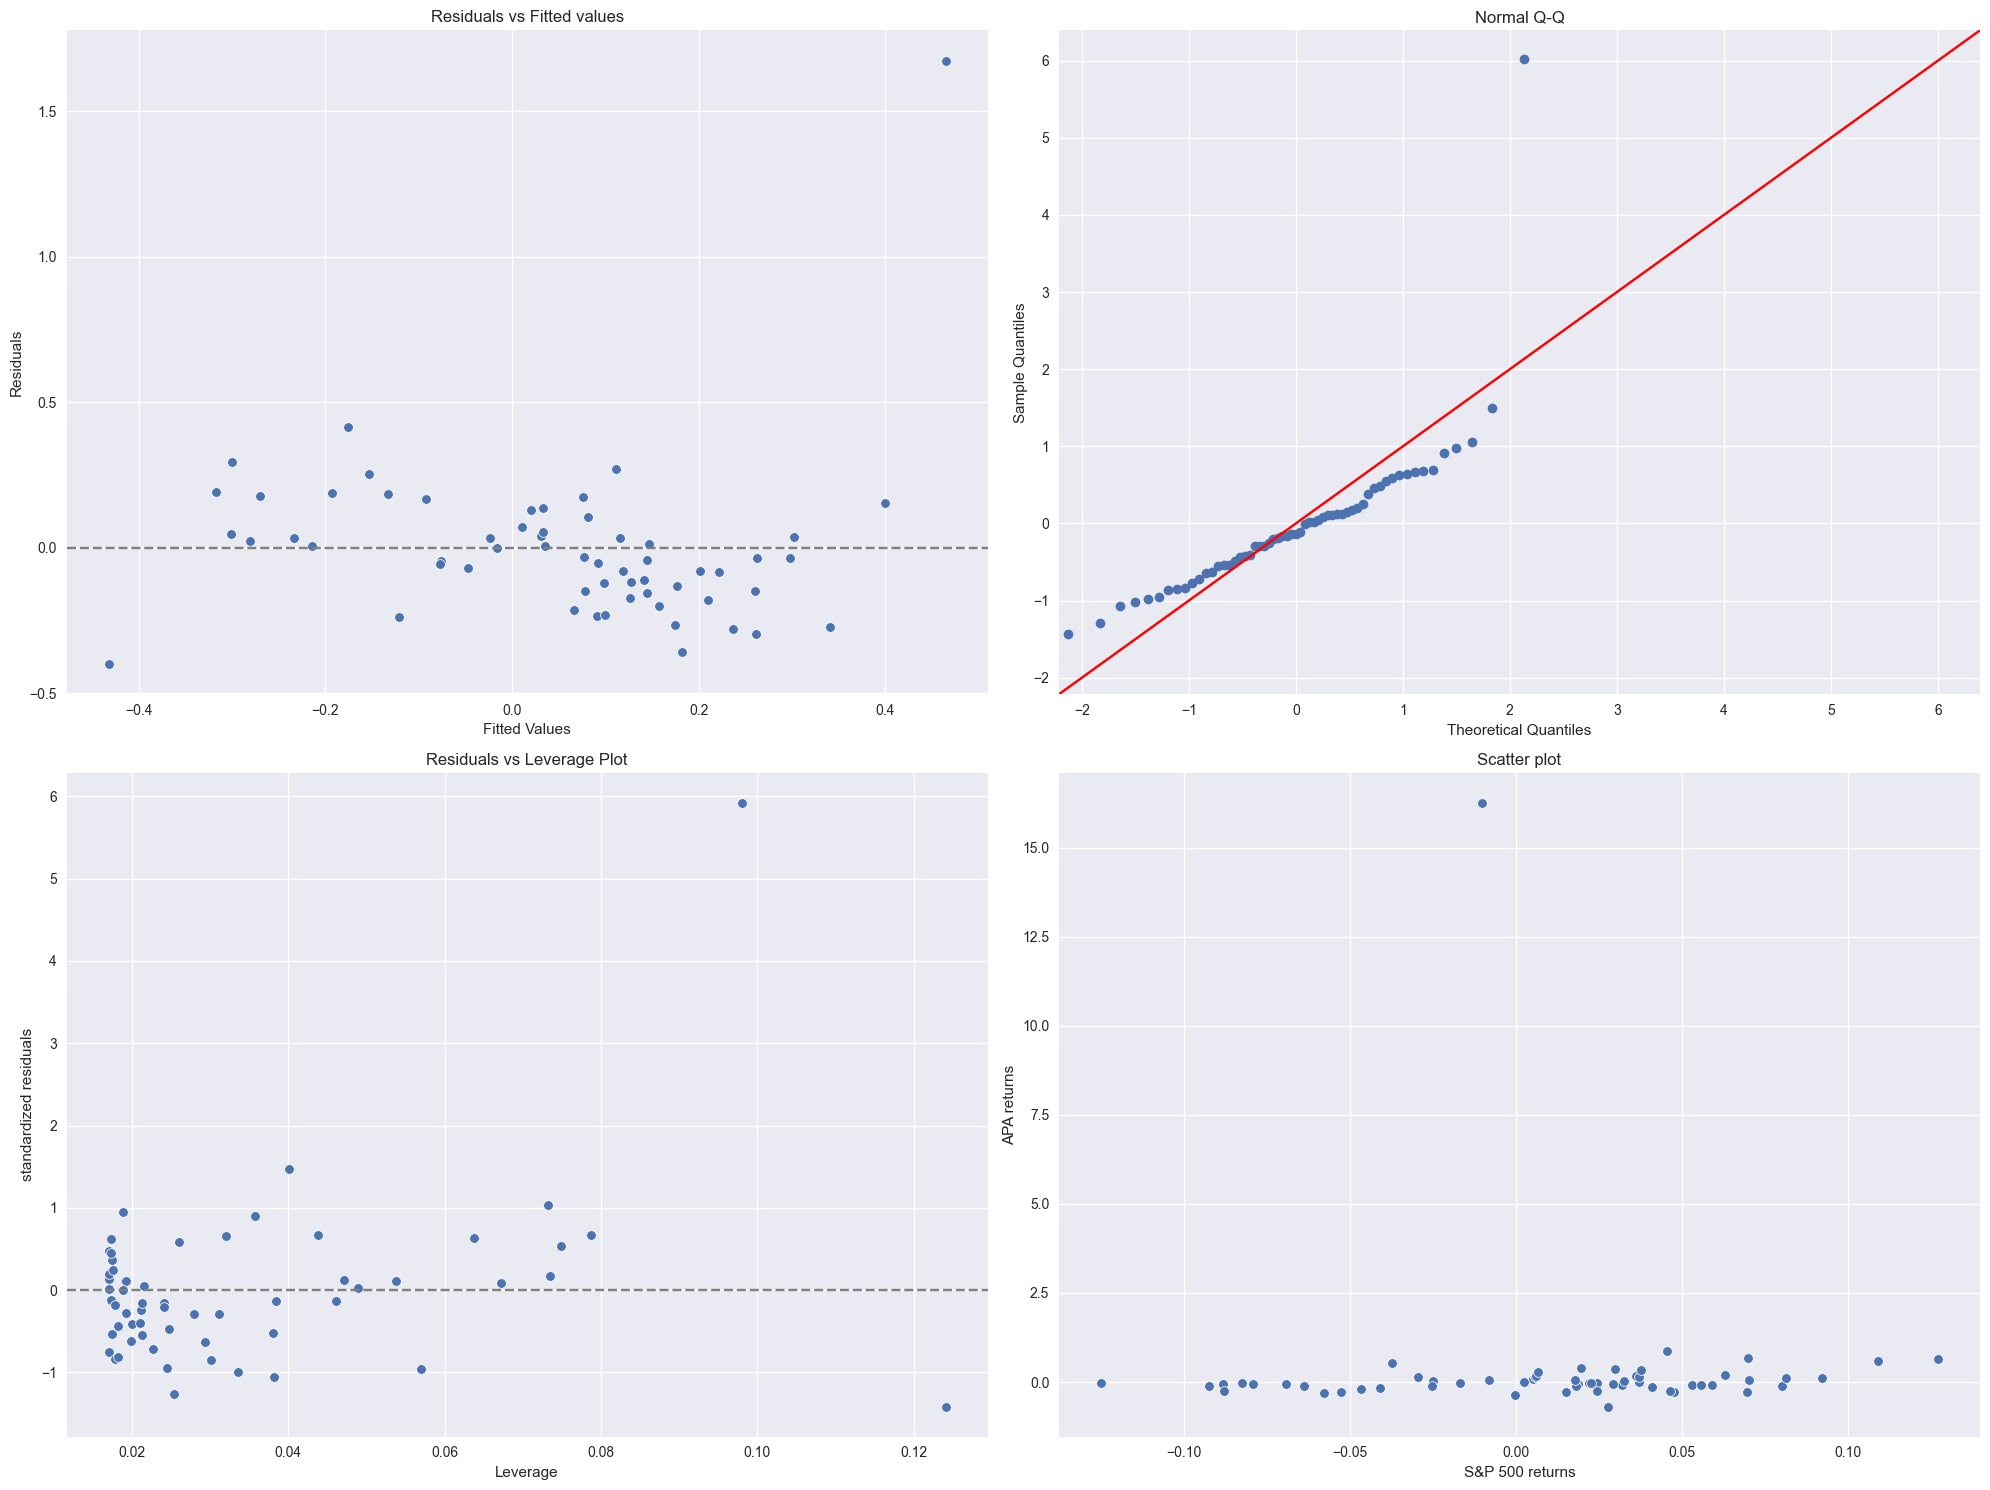

In [241]:
X = monthly_return['SPY']
X_c = sm.add_constant(X)
Y = df_monthly_return['APA']
result = sm.OLS(Y, X_c).fit()

# Get different Variables for diagnostic
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
influence = result.get_influence()
leverage = influence.hat_matrix_diag
  
# PLot different diagnostic plots
#plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))  
plt.style.use('seaborn')
  
# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_title('Residuals vs Fitted values')
  
# Normal Q-Q plot
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q')
  
 
# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Leverage')
ax[1, 0].set_ylabel('standardized residuals')
ax[1, 0].set_title('Residuals vs Leverage Plot')

# Scatter plot
sns.scatterplot(x=X1, y=Y1, ax=ax[1, 1])
ax[1, 1].set_xlabel('S&P 500 returns')
ax[1, 1].set_ylabel('APA returns')
ax[1, 1].set_title('Scatter plot')


  

plt.tight_layout()
plt.show()


<Axes: xlabel='Date'>

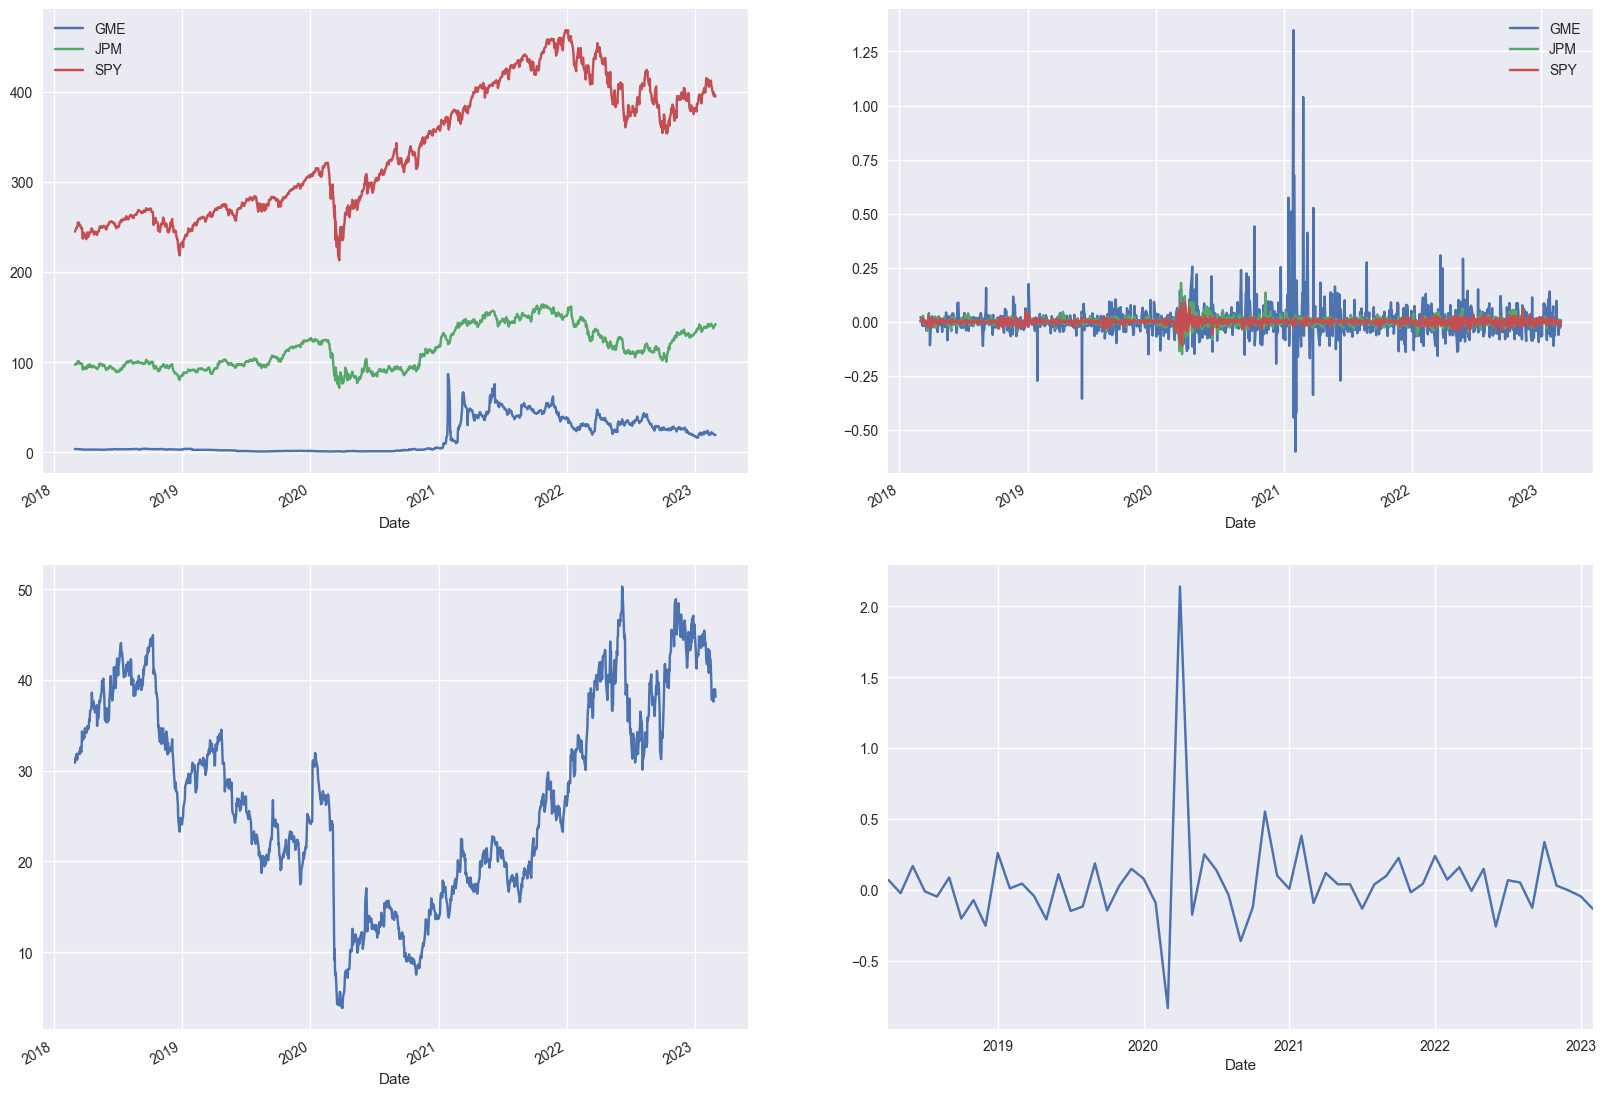

In [243]:
# Scatter plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))  

gme.plot(ax=ax[0,0])
gme_returns.plot(ax=ax[0,1])
  

df['APA'].plot(ax=ax[1,0])
df_monthly_return['APA'].plot(ax=ax[1,1])

In [245]:
tickers[tickers['Symbol'] == 'APA']

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
43,APA,APA Corporation,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,1841666,1954


- So what's up with the APA returns? It looks like this was just post-covid market crash effects...

In [279]:
for tick in list(df_outliers.columns):
    print(tickers[tickers['Symbol'] == tick]['GICS Sector'])

28    Utilities
Name: GICS Sector, dtype: object
11    Financials
Name: GICS Sector, dtype: object
49    Financials
Name: GICS Sector, dtype: object
16    Materials
Name: GICS Sector, dtype: object
15    Industrials
Name: GICS Sector, dtype: object
41    Information Technology
Name: GICS Sector, dtype: object
43    Energy
Name: GICS Sector, dtype: object
13    Materials
Name: GICS Sector, dtype: object
52    Utilities
Name: GICS Sector, dtype: object
60    Consumer Discretionary
Name: GICS Sector, dtype: object
81    Consumer Staples
Name: GICS Sector, dtype: object
68    Health Care
Name: GICS Sector, dtype: object
78    Industrials
Name: GICS Sector, dtype: object
74    Real Estate
Name: GICS Sector, dtype: object
93    Industrials
Name: GICS Sector, dtype: object
94    Financials
Name: GICS Sector, dtype: object
95    Real Estate
Name: GICS Sector, dtype: object
90    Consumer Discretionary
Name: GICS Sector, dtype: object
96    Information Technology
Name: GICS Sector, dtype: objec

### Other MEME Stocks

In [246]:
memes = ['GME', 'AMC', 'BB', 'NOK']
memes_df = yf.download(memes,'2018-03-01','2023-03-01', auto_adjust=True)['Close']
memes_df.head()

[*********************100%***********************]  4 of 4 completed


,AMC,BB,GME,NOK
Date,,,,
2018-03-01,12.019482,12.11,3.488268,5.345045
2018-03-02,12.834361,12.36,3.564343,5.354325
2018-03-05,12.834361,12.39,3.591193,5.428562
2018-03-06,12.997334,12.44,3.593430,5.400723
2018-03-07,12.793616,12.50,3.566581,5.456400


<Axes: xlabel='Date'>

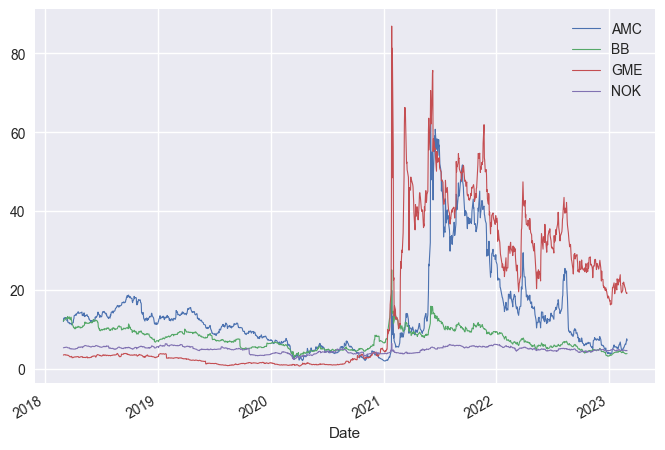

In [251]:
memes_df.plot(linewidth = 0.8)

In [254]:
memes_monthly_return = memes_df.resample('M').ffill().pct_change()[1:]
# df_monthly_return = df_monthly_return.dropna(axis=0)
memes_monthly_return.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2018-04-30 to 2023-02-28
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMC     59 non-null     float64
 1   BB      59 non-null     float64
 2   GME     59 non-null     float64
 3   NOK     59 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


In [256]:
memes

['GME', 'AMC', 'BB', 'NOK']

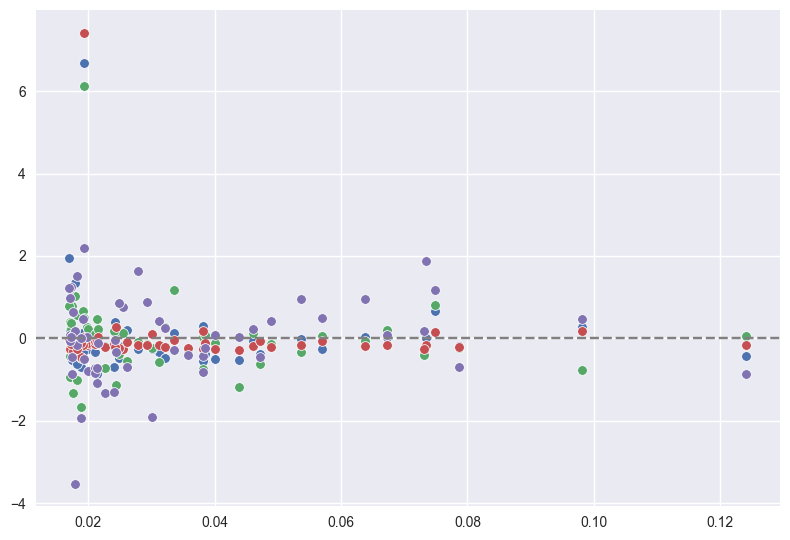

In [266]:
X = monthly_return['SPY']
X_c = sm.add_constant(X)

Y1 = memes_monthly_return['AMC']
Y2 = memes_monthly_return['BB']
Y3 = memes_monthly_return['GME']
Y4 = memes_monthly_return['NOK']
result1 = sm.OLS(Y1, X_c).fit()
result2 = sm.OLS(Y2, X_c).fit()
result3 = sm.OLS(Y3, X_c).fit()
result4 = sm.OLS(Y4, X_c).fit()

# Get different Variables for diagnostic
residuals1 = result1.resid
fitted_value1 = result1.fittedvalues
stand_resids1 = result1.resid_pearson
influence1 = result1.get_influence()
leverage1 = influence1.hat_matrix_diag

residuals3 = result3.resid
fitted_value3 = result3.fittedvalues
stand_resids3 = result3.resid_pearson
influence3 = result3.get_influence()
leverage3 = influence3.hat_matrix_diag

residuals4 = result4.resid
fitted_value4 = result4.fittedvalues
stand_resids4 = result4.resid_pearson
influence4 = result4.get_influence()
leverage4 = influence4.hat_matrix_diag

residuals2 = result2.resid
fitted_value2 = result2.fittedvalues
stand_resids2 = result2.resid_pearson
influence2 = result2.get_influence()
leverage2 = influence2.hat_matrix_diag
  
 
 
# Residual vs Leverage Plot
sns.scatterplot(x=leverage1, y=stand_resids1)
sns.scatterplot(x=leverage2, y=stand_resids2)
sns.scatterplot(x=leverage3, y=stand_resids3)
sns.scatterplot(x=leverage4, y=stand_resids4)
plt.axhline(y=0, color='grey', linestyle='dashed')
#plt.set_xlabel('Leverage')
#plt.set_ylabel('standardized residuals')
#plt.set_title('Residuals vs Leverage Plot')

plt.tight_layout()
# plt.legend()
plt.show()

### Russell 2000 stocks (as of Dec 2021)

In [3]:
# from: https://medium.datadriveninvestor.com/data-collection-for-2000-stocks-using-python-and-apis-a80738c436d4
ticker = ["AAN","AAOI","AAON","AAT","AAWW","AAXN","ABCB","ABEO","ABG","ABM","ABTX","AC","ACA","ACAD","ACBI","ACCO","ACER","ACHN","ACIA","ACIW","ACLS","ACNB","ACOR","ACRE","ACRS","ACRX","ACTG","ADC","ADES","ADMA","ADMS","ADNT","ADRO","ADSW","ADTN","ADUS","ADVM","AEGN","AEIS","AEL","AEO","AERI","AFI","AFIN","AFMD","AGE","AGEN","AGLE","AGM","AGS","AGX","AGYS","AHH","AHT","AI","AIMC","AIMT","AIN","AIR","AIRG","AIT","AJRD","AJX","AKBA","AKCA","AKR","AKRO","AKRX","AKS","AKTS","ALBO","ALCO","ALDR","ALDX","ALE","ALEC","ALEX","ALG","ALGT","ALLK","ALLO","ALOT","ALRM","ALTM","ALTR","ALX","AMAG","AMAL","AMBA","AMBC","AMC","AMED","AMEH","AMK","AMKR","AMN","AMNB","AMOT","AMPH","AMRC","AMRS","AMRX","AMSC","AMSF","AMSWA","AMTB","AMWD","ANAB","ANDE","ANF","ANGO","ANH","ANIK","ANIP","AOBC","AOSL","APAM","APEI","APLS","APOG","APPF","APPN","APPS","APTS","APYX","AQUA","ARA","ARAY","ARCB","ARCH","ARDX","ARES","ARGO","ARI","ARL","ARLO","ARNA","AROC","AROW","ARQL","ARR","ARTNA","ARVN","ARWR","ASC","ASGN","ASIX","ASMB","ASNA","ASPS","ASRT","ASTE","AT","ATEC","ATEN","ATEX","ATGE","ATHX","ATI","ATKR","ATLO","ATNI","ATNX","ATRA","ATRC","ATRI","ATRO","ATRS","ATSG","AUB","AVA","AVAV","AVCO","AVD","AVDR","AVID","AVNS","AVRO","AVX","AVXL","AVYA","AWR","AX","AXAS","AXDX","AXE","AXGN","AXL","AXLA","AXNX","AXSM","AXTI","AYR","AZZ","B","BANC","BAND","BANF","BANR","BATRA","BATRK","BBBY","BBCP","BBIO","BBSI","BBX","BCBP","BCC","BCEI","BCEL","BCML","BCO","BCOR","BCOV","BCPC","BCRX","BDC","BDGE","BDSI","BE","BEAT","BECN","BELFB","BFC","BFIN","BFS","BFST","BGG","BGS","BGSF","BH","BHB","BHE","BHLB","BHR","BHVN","BIG","BIOS","BJ","BJRI","BKD","BKE","BKH","BL","BLBD","BLD","BLDR","BLFS","BLKB","BLMN","BLX","BMCH","BMI","BMRC","BMTC","BNED","BNFT","BOCH","BOLD","BOMN","BOOM","BOOT","BOX","BPFH","BPMC","BPRN","BRC","BREW","BRG","BRID","BRKL","BRKS","BRT","BRY","BSET","BSGM","BSIG","BSRR","BSTC","BSVN","BTAI","BTU","BUSE","BV","BWB","BWFG","BXC","BXG","BXMT","BXS","BY","BYD","BYSI","BZH","CAC","CADE","CAI","CAKE","CAL","CALA","CALM","CALX","CAMP","CAR","CARA","CARB","CARE","CARG","CARO","CARS","CASA","CASH","CASI","CASS","CATC","CATM","CATO","CATS","CATY","CBAN","CBAY","CBB","CBL","CBLK","CBM","CBMG","CBNK","CBPX","CBRL","CBTX","CBU","CBZ","CCB","CCBG","CCF","CCMP","CCNE","CCO","CCOI","CCRN","CCS","CCXI","CDE","CDLX","CDMO","CDNA","CDR","CDXC","CDXS","CDZI","CECE","CECO","CEIX","CELC","CELH","CENT","CENTA","CENX","CERC","CERS","CETV","CEVA","CFB","CFFI","CFFN","CFMS","CHAP","CHCO","CHCT","CHDN","CHEF","CHGG","CHMA","CHMG","CHMI","CHRA","CHRS","CHS","CHUY","CIA","CIO","CIR","CISN","CIVB","CIX","CJ","CKH","CKPT","CLAR","CLBK","CLCT","CLDR","CLDT","CLF","CLFD","CLI","CLNC","CLNE","CLPR","CLVS","CLW","CLXT","CMBM","CMC","CMCO","CMCT","CMLS","CMO","CMP","CMPR","CMRE","CMRX","CMTL","CNBKA","CNCE","CNDT","CNMD","CNNE","CNO","CNOB","CNR","CNS","CNSL","CNST","CNTY","CNX","CNXN","CODA","COHU","COKE","COLB","COLL","CONN","COOP","CORE","CORR","CORT","COWN","CPE","CPF","CPK","CPLG","CPRX","CPS","CPSI","CRAI","CRBP","CRC","CRCM","CRD.A","CRK","CRMD","CRMT","CRNX","CROX","CRS","CRTX","CRUS","CRVL","CRY","CRZO","CSFL","CSGS","CSII","CSLT","CSOD","CSTE","CSTL","CSTR","CSV","CSWI","CTB","CTBI","CTMX","CTO","CTRA","CTRC","CTRE","CTRN","CTS","CTSO","CTT","CTWS","CUB","CUBI","CUE","CULP","CURO","CUTR","CVA","CVBF","CVCO","CVCY","CVGI","CVGW","CVI","CVIA","CVLT","CVLY","CVM","CVRS","CVTI","CWCO","CWEN","CWEN.A","CWH","CWK","CWST","CWT","CXW","CYCN","CYH","CYRX","CYTK","CZNC","DAKT","DAN","DAR","DBD","DBI","DCO","DCOM","DCPH","DDD","DDS","DEA","DECK","DENN","DERM","DF","DFIN","DGICA","DGII","DHIL","DHT","DHX","DIN","DIOD","DJCO","DK","DLA","DLTH","DLX","DMRC","DNBF","DNLI","DNOW","DNR","DO","DOC","DOMO","DOOR","DORM","DOVA","DPLO","DRH","DRNA","DRQ","DS","DSKE","DSPG","DSSI","DTIL","DVAX","DX","DXPE","DY","DZSI","EAT","EB","EBF","EBIX","EBS","EBSB","EBTC","ECHO","ECOL","ECOM","ECOR","ECPG","EDIT","EE","EEX","EFC","EFSC","EGAN","EGBN","EGHT","EGLE","EGOV","EGP","EGRX","EHTH","EIDX","EIG","EIGI","EIGR","ELF","ELOX","ELVT","ELY","EME","EML","ENDP","ENFC","ENOB","ENPH","ENS","ENSG","ENTA","ENV","ENVA","ENZ","EOLS","EPAY","EPC","EPM","EPRT","EPZM","EQBK","ERA","ERI","ERII","EROS","ESCA","ESE","ESGR","ESNT","ESPR","ESQ","ESSA","ESTE","ESXB","ETH","ETM","EVBG","EVBN","EVC","EVER","EVFM","EVH","EVI","EVLO","EVOP","EVRI","EVTC","EXLS","EXPI","EXPO","EXPR","EXTN","EXTR","EYE","EYPT","EZPW","FARM","FARO","FATE","FBC","FBIZ","FBK","FBM","FBMS","FBNC","FBP","FC","FCAP","FCBC","FCBP","FCCY","FCF","FCFS","FCN","FCPT","FDBC","FDEF","FDP","FELE","FET","FF","FFBC","FFG","FFIC","FFIN","FFNW","FFWM","FG","FGBI","FGEN","FI","FIBK","FII","FISI","FIT","FIVN","FIX","FIXX","FIZZ","FLDM","FLIC","FLMN","FLNT","FLOW","FLWS","FLXN","FLXS","FMAO","FMBH","FMBI","FMNB","FN","FNCB","FNHC","FNKO","FNLC","FNWB","FOCS","FOE","FOLD","FOR","FORM","FORR","FOSL","FOXF","FPI","FPRX","FR","FRAC","FRAF","FRBA","FRBK","FRGI","FRME","FRPH","FRPT","FRTA","FSB","FSBW","FSCT","FSP","FSS","FSTR","FTK","FTR","FTSI","FTSV","FUL","FULC","FULT","FVCB","FWRD","GABC","GAIA","GALT","GATX","GBCI","GBL","GBLI","GBT","GBX","GCAP","GCBC","GCI","GCO","GCP","GDEN","GDOT","GDP","GEF","GEF.B","GEN","GENC","GEO","GEOS","GERN","GES","GFF","GFN","GHDX","GHL","GHM","GIII","GKOS","GLDD","GLNG","GLOG","GLRE","GLT","GLUU","GLYC","GME","GMED","GMRE","GMS","GNC","GNE","GNK","GNL","GNLN","GNMK","GNRC","GNTY","GNW","GOGO","GOLF","GOOD","GORO","GOSS","GPI","GPMT","GPOR","GPRE","GPRO","GPX","GRBK","GRC","GRIF","GRPN","GRTS","GSBC","GSHD","GSIT","GTHX","GTLS","GTN","GTS","GTT","GTY","GTYH","GVA","GWB","GWGH","GWRS","HA","HABT","HAE","HAFC","HALL","HALO","HARP","HASI","HAYN","HBB","HBCP","HBMD","HBNC","HCAT","HCC","HCCI","HCI","HCKT","HCSG","HEES","HELE","HFFG","HFWA","HI","HIBB","HIFS","HIIQ","HL","HLI","HLIO","HLIT","HLNE","HLX","HMHC","HMN","HMST","HMSY","HMTV","HNGR","HNI","HNRG","HOFT","HOMB","HOME","HONE","HOOK","HOPE","HPR","HQY","HR","HRI","HRTG","HRTX","HSC","HSII","HSKA","HSTM","HT","HTBI","HTBK","HTH","HTLD","HTLF","HTZ","HUBG","HUD","HURC","HURN","HVT","HWBK","HWC","HWKN","HY","HZO","I","IBCP","IBKC","IBOC","IBP","IBTX","ICD","ICFI","ICHR","ICPT","IDCC","IDEX","IDT","IESC","IHC","III","IIIN","IIIV","IIN","IIPR","IIVI","ILPT","IMAX","IMGN","IMKTA","IMMR","IMMU","IMXI","INBK","INDB","INFN","INGN","INN","INO","INOV","INS","INSE","INSG","INSM","INSP","INST","INSW","INT","INTL","INVA","INWK","IOSP","IOTS","IOVA","IPAR","IPHI","IPHS","IPI","IRBT","IRDM","IRET","IRMD","IRT","IRTC","IRWD","ISBC","ISCA","ISRL","ISTR","ITCI","ITGR","ITI","ITIC","ITRI","IVC","IVR","JACK","JAG","JAX","JBSS","JBT","JCAP","JCOM","JCP","JELD","JILL","JJSF","JNCE","JOE","JOUT","JRVR","JYNT","KAI","KALA","KALU","KALV","KAMN","KBAL","KBH","KBR","KDMN","KE","KELYA","KEM","KFRC","KFY","KIDS","KIN","KLDO","KLXE","KMT","KN","KNL","KNSA","KNSL","KOD","KOP","KPTI","KRA","KREF","KRG","KRNY","KRO","KRTX","KRUS","KRYS","KTB","KTOS","KURA","KVHI","KW","KWR","KZR","LAD","LADR","LANC","LAND","LASR","LAUR","LAWS","LBAI","LBC","LBRT","LC","LCI","LCII","LCNB","LCTX","LCUT","LDL","LE","LEAF","LEE","LEGH","LEVL","LFVN","LGIH","LGND","LHCG","LILA","LILAK","LIND","LITE","LIVN","LIVX","LJPC","LKFN","LKSD","LL","LLNW","LMAT","LMNR","LMNX","LNDC","LNN","LNTH","LOB","LOCO","LOGC","LORL","LOVE","LPG","LPI","LPSN","LPX","LQDA","LQDT","LRN","LSCC","LTC","LTHM","LTRPA","LTS","LTXB","LVGO","LXFR","LXP","LXRX","LXU","LZB","MANT","MATW","MATX","MAXR","MBI","MBII","MBIN","MBIO","MBUU","MBWM","MC","MCB","MCBC","MCFT","MCHX","MCRB","MCRI","MCRN","MCS","MDC","MDCA","MDCO","MDGL","MDP","MDR","MDRX","MEC","MED","MEDP","MEET","MEI","MEIP","MESA","METC","MFIN","MFNC","MFSF","MG","MGEE","MGLN","MGNX","MGPI","MGRC","MGTA","MGTX","MGY","MHO","MIK","MINI","MIRM","MITK","MITT","MJCO","MLAB","MLHR","MLI","MLND","MLP","MLR","MLVF","MMAC","MMI","MMS","MMSI","MNK","MNKD","MNLO","MNOV","MNR","MNRL","MNRO","MNSB","MNTA","MOBL","MOD","MODN","MOFG","MOG.A","MORF","MOV","MPAA","MPB","MPX","MR","MRC","MRCY","MRKR","MRLN","MRNS","MRSN","MRTN","MRTX","MSA","MSBI","MSEX","MSGN","MSON","MSTR","MTDR","MTEM","MTH","MTOR","MTRN","MTRX","MTSC","MTSI","MTW","MTX","MTZ","MUSA","MVBF","MWA","MXL","MYE","MYGN","MYOK","MYRG","NANO","NAT","NATH","NATR","NAV","NBEV","NBHC","NBN","NBR","NBTB","NC","NCBS","NCI","NCMI","NCSM","NDLS","NE","NEO","NEOG","NERV","NESR","NEWM","NEXT","NFBK","NG","NGHC","NGM","NGS","NGVC","NGVT","NHC","NHI","NINE","NJR","NKSH","NL","NMIH","NMRK","NNBR","NNI","NODK","NOG","NOVA","NOVT","NP","NPK","NPO","NPTN","NR","NRC","NRCG","NRIM","NSA","NSIT","NSP","NSSC","NSTG","NTB","NTCT","NTGN","NTGR","NTLA","NTRA","NTUS","NUVA","NVAX","NVCR","NVEC","NVEE","NVRO","NVTA","NWBI","NWE","NWFL","NWLI","NWN","NWPX","NX","NXGN","NXRT","NXTC","NYMT","NYNY","OAS","OBNK","OCFC","OCN","OCUL","OCX","ODC","ODP","ODT","OEC","OFG","OFIX","OFLX","OGS","OII","OIS","OLBK","OLP","OMCL","OMER","OMI","OMN","ONB","ONCE","ONDK","OOMA","OPB","OPBK","OPI","OPK","OPRX","OPTN","OPY","ORA","ORBC","ORC","ORGO","ORIT","ORRF","OSBC","OSG","OSIS","OSMT","OSPN","OSTK","OSUR","OSW","OTTR","OVBC","OVLY","OXM","PACB","PACD","PAHC","PAR","PARR","PATK","PAYS","PBFS","PBH","PBI","PBIP","PBPB","PBYI","PCB","PCH","PCRX","PCSB","PCYO","PDCE","PDCO","PDFS","PDLB","PDLI","PDM","PEB","PEBK","PEBO","PEGI","PEI","PENN","PETQ","PETS","PFBC","PFBI","PFGC","PFIS","PFNX","PFS","PFSI","PGC","PGNX","PGTI","PHAS","PHR","PHUN","PHX","PI","PICO","PIRS","PJC","PJT","PKBK","PKD","PKE","PKOH","PLAB","PLAY","PLCE","PLMR","PLOW","PLPC","PLSE","PLT","PLUG","PLUS","PLXS","PMBC","PMT","PNM","PNRG","PNTG","POL","POR","POWI","POWL","PPBI","PQG","PRA","PRAA","PRFT","PRGS","PRGX","PRIM","PRK","PRLB","PRMW","PRNB","PRO","PROS","PROV","PRPL","PRSC","PRSP","PRTA","PRTH","PRTK","PRTY","PRVL","PSB","PSDO","PSMT","PSN","PSNL","PTCT","PTE","PTGX","PTLA","PTN","PTSI","PTVCB","PUB","PUMP","PVAC","PVBC","PWOD","PYX","PZN","PZZA","QADA","QCRH","QDEL","QEP","QLYS","QNST","QTRX","QTS","QTWO","QUAD","QUOT","RAD","RAMP","RARE","RARX","RAVN","RBB","RBBN","RBCAA","RBNC","RC","RCII","RCKT","RCKY","RCM","RCUS","RDFN","RDI","RDN","RDNT","RDUS","REAL","RECN","REGI","REI","REPH","REPL","RES","RESI","RETA","REV","REVG","REX","REXR","RFL","RGCO","RGEN","RGNX","RGR","RGS","RH","RHP","RICK","RIGL","RILY","RLGT","RLGY","RLH","RLI","RLJ","RM","RMAX","RMBI","RMBS","RMNI","RMR","RMTI","RNET","RNST","ROAD","ROAN","ROCK","ROG","ROIC","ROLL","ROSE","RPD","RPT","RRBI","RRD","RRGB","RRR","RRTS","RST","RTEC","RTIX","RTRX","RTW","RUBI","RUBY","RUN","RUSHA","RUSHB","RUTH","RVI","RVNC","RVSB","RWT","RXN","RYAM","RYI","RYTM","SAFE","SAFM","SAFT","SAH","SAIA","SAIC","SAIL","SALT","SAM","SAMG","SANM","SASR","SAVE","SB","SBBP","SBBX","SBCF","SBH","SBOW","SBRA","SBSI","SBT","SCHL","SCHN","SCL","SCOR","SCS","SCSC","SCU","SCVL","SCWX","SD","SDRL","SEAS","SEM","SEMG","SENEA","SENS","SF","SFBS","SFE","SFIX","SFL","SFNC","SFST","SGA","SGC","SGH","SGMO","SGMS","SGRY","SHAK","SHBI","SHEN","SHO","SHOO","SHSP","SIBN","SIC","SIEB","SIEN","SIG","SIGA","SIGI","SILK","SITE","SJI","SJW","SKT","SKY","SKYW","SLAB","SLCA","SLCT","SLDB","SLP","SM","SMBC","SMBK","SMHI","SMMF","SMP","SMPL","SMTC","SNBR","SNCR","SND","SNDX","SNH","SNR","SOI","SOLY","SONA","SONM","SONO","SP","SPAR","SPFI","SPKE","SPNE","SPOK","SPPI","SPRO","SPSC","SPTN","SPWH","SPWR","SPXC","SR","SRCE","SRCI","SRDX","SRG","SRI","SRNE","SRRK","SRT","SSB","SSD","SSP","SSTI","SSTK","SSYS","STAA","STAG","STAR","STBA","STC","STFC","STIM","STML","STMP","STNG","STOK","STRA","STRL","STRO","STRS","STXB","SUM","SUPN","SVMK","SVRA","SWAV","SWM","SWN","SWX","SXC","SXI","SXT","SYBT","SYBX","SYKE","SYNA","SYNH","SYNL","SYRS","SYX","TACO","TALO","TAST","TBBK","TBI","TBIO","TBK","TBNK","TBPH","TCBK","TCDA","TCFC","TCI","TCMD","TCRR","TCS","TCX","TDOC","TDW","TECD","TELL","TEN","TENB","TERP","TESS","TEUM","TEX","TG","TGH","TGI","TGNA","TGTX","TH","THC","THFF","THOR","THR","THRM","TILE","TIPT","TISI","TITN","TIVO","TK","TLRA","TLRD","TLYS","TMDX","TMHC","TMP","TMST","TNAV","TNC","TNDM","TNET","TNK","TOCA","TORC","TOWN","TPB","TPC","TPCO","TPH","TPIC","TPRE","TPTX","TR","TRC","TREC","TREX","TRHC","TRMK","TRNO","TRNS","TROX","TRS","TRST","TRTN","TRTX","TRUE","TRUP","TRWH","TRXC","TSBK","TSC","TSE","TTEC","TTEK","TTGT","TTI","TTMI","TTS","TUP","TUSK","TVTY","TWI","TWIN","TWNK","TWST","TXMD","TXRH","TYME","TYPE","TZOO","UBA","UBFO","UBNK","UBSI","UBX","UCBI","UCFC","UCTT","UE","UEC","UEIC","UFCS","UFI","UFPI","UFPT","UHT","UIHC","UIS","ULH","UMBF","UMH","UNB","UNF","UNFI","UNIT","UNT","UNTY","UPLD","UPWK","URGN","USCR","USLM","USNA","USPH","USWS","USX","UTL","UTMD","UUUU","UVE","UVSP","UVV","VAC","VALU","VAPO","VBIV","VBTX","VC","VCEL","VCRA","VCYT","VEC","VECO","VG","VGR","VHC","VHI","VIAV","VICR","VIVO","VKTX","VLGEA","VLY","VNCE","VNDA","VPG","VRA","VRAY","VRCA","VREX","VRNS","VRNT","VRRM","VRS","VRTS","VRTU","VRTV","VSEC","VSH","VSLR","VSTO","VVI","VYGR","WAAS","WABC","WAFD","WAIR","WASH","WATT","WBT","WD","WDFC","WDR","WERN","WETF","WEYS","WGO","WHD","WHG","WIFI","WINA","WING","WIRE","WK","WLDN","WLFC","WLH","WLL","WMC","WMGI","WMK","WMS","WNC","WNEB","WOR","WOW","WPG","WRE","WRLD","WRTC","WSBC","WSBF","WSC","WSFS","WSR","WTBA","WTI","WTRE","WTRH","WTS","WTTR","WVE","WW","WWW","XAN","XBIT","XELA","XENT","XERS","XFOR","XHR","XLRN","XNCR","XOG","XON","XPER","XXII","YCBD","YELP","YETI","YEXT","YGYI","YMAB","YORW","YRCW","ZAGG","ZEUS","ZGNX","ZIOP","ZIXI","ZUMZ","ZUO","ZYNE","ZYXI"]

In [10]:
print("AMC" in ticker)
print("GME" in ticker)
print("BB" in ticker)
print("NOK" in ticker)

True
True
False
False


In [12]:
# Get the data for the tickers from yahoo finance
data = yf.download(ticker,'2018-03-01','2023-03-01', auto_adjust=True)['Close']

[*********************100%***********************]  1999 of 1999 completed

418 Failed downloads:
- MNLO: No timezone found, symbol may be delisted
- FII: No timezone found, symbol may be delisted
- ADMS: No timezone found, symbol may be delisted
- SAIL: No timezone found, symbol may be delisted
- WETF: No timezone found, symbol may be delisted
- AKCA: No timezone found, symbol may be delisted
- NYNY: No timezone found, symbol may be delisted
- APTS: No timezone found, symbol may be delisted
- PEGI: No timezone found, symbol may be delisted
- HBMD: No timezone found, symbol may be delisted
- CMO: No timezone found, symbol may be delisted
- ANH: No timezone found, symbol may be delisted
- QEP: No timezone found, symbol may be delisted
- IVC: No timezone found, symbol may be delisted
- FNHC: No timezone found, symbol may be delisted
- RXN: No timezone found, symbol may be delisted
- CATS: No timezone found, symbol may be delisted
- AVYA: No timezone found, symbol may be delisted
- NP: No

In [15]:
data.to_csv('Russell2000FromDec21.csv')

In [2]:
df = pd.read_csv('Russell2000FromDec21.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Columns: 2000 entries, Date to ZYXI
dtypes: float64(1999), object(1)
memory usage: 19.2+ MB


In [3]:
df.Date = pd.to_datetime(df.Date, format='%d/%m/%Y') # convert 'date' to actual date
df = df.set_index('Date')

In [4]:
df_monthly_return = df.resample('M').ffill().pct_change()[1:]
# df_monthly_return = df_monthly_return.dropna(axis=0)
df_monthly_return.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2018-04-30 to 2023-02-28
Freq: M
Columns: 1999 entries, AAN to ZYXI
dtypes: float64(1999)
memory usage: 921.9 KB


In [42]:
df_outliers = pd.DataFrame()
df_dates_outliers = pd.DataFrame()
df_outliers_neg = pd.DataFrame()


X = monthly_return['SPY']
X_c = sm.add_constant(X)

v = 4.5

for tick in df.columns:
    Y = df_monthly_return[tick]
    result = sm.OLS(Y, X_c).fit()
    stand_resids = result.resid_pearson
    
    if np.count_nonzero(stand_resids >= v) > 0:
        df_outliers[tick] = [np.where(stand_resids >= v)[0][0], np.extract(stand_resids >= v, stand_resids)[0], Y[np.where(stand_resids >= v)[0][0]]]
        
    
    if np.count_nonzero(stand_resids <= -v) > 0:
        df_outliers_neg[tick] = [np.where(stand_resids <= -v)[0][0], np.extract(stand_resids <= -v, stand_resids)[0], Y[np.where(stand_resids <= -v)[0][0]]]


In [43]:
df_outliers

,ACOR,ACRS,ADES,AFMD,AIMC,ALBO,AMC,ANAB,APPN,ATHX,...,UIHC,UUUU,UVE,UVV,VKTX,WATT,XFOR,XHR,YGYI,ZYNE
0,54.000000,33.000000,37.000000,4.000000,54.000000,57.000000,33.000000,30.000000,31.000000,23.000000,...,56.000000,32.000000,58.000000,1.000000,1.000000,24.000000,7.000000,31.000000,54.00000,12.000000
1,6.077230,5.819574,4.926725,6.130056,4.641532,5.372706,6.692001,4.889378,4.596022,4.682849,...,6.507761,4.721843,4.536505,4.505246,4.581729,5.570045,5.678037,4.591021,4.62132,4.887848
2,2.566667,2.207110,0.689362,2.027778,0.788816,1.066636,5.254717,0.997288,1.211690,1.500000,...,2.312500,1.048077,0.517268,0.405951,1.424757,2.001346,1.902985,0.709952,3.01000,1.309963


In [24]:
df_outliers.columns.get_loc

<bound method Index.get_loc of Index(['ACER', 'ACOR', 'ACRS', 'ACTG', 'ADES', 'ADNT', 'AFMD', 'AIMC', 'AKBA',
       'ALBO',
       ...
       'VYGR', 'WATT', 'WING', 'WVE', 'XFOR', 'XHR', 'XXII', 'YELP', 'YGYI',
       'ZYNE'],
      dtype='object', length=156)>

<Axes: xlabel='Date', ylabel='Stand Residual'>

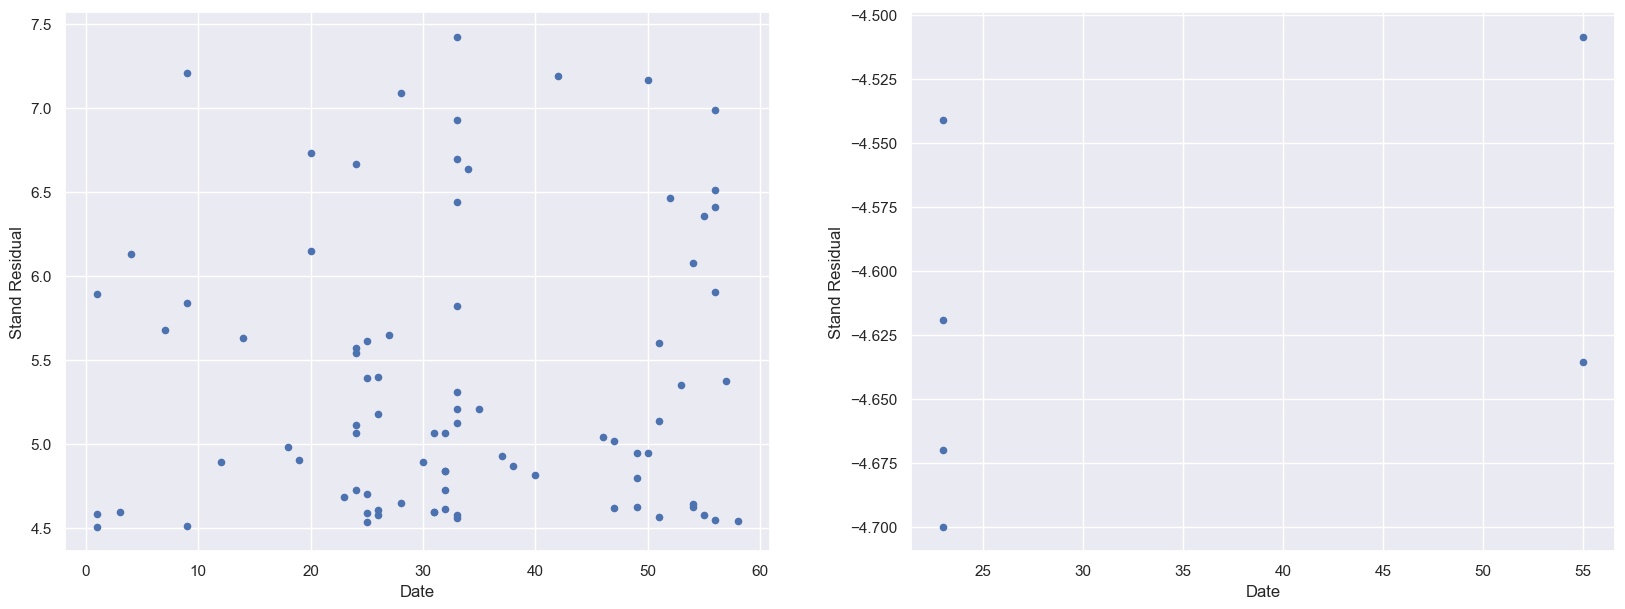

In [67]:
df1_transposed = df_outliers.T
df1_transposed = df1_transposed.rename(columns={0: "Date", 1: "Stand Residual", 2: 'Stock returns %'})
df1_transposed_neg = df_outliers_neg.T
df1_transposed_neg = df1_transposed_neg.rename(columns={0: "Date",  1: "Stand Residual", 2: 'Stock returns %'})

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

df1_transposed.plot.scatter(ax = ax[0], x='Date', y='Stand Residual')
df1_transposed_neg.plot.scatter(ax = ax[1], x='Date', y='Stand Residual')

In [68]:
df1_monthly_return = df_monthly_return.reset_index()['Date']
df1_monthly_return.head()

0   2018-04-30
1   2018-05-31
2   2018-06-30
3   2018-07-31
4   2018-08-31
Name: Date, dtype: datetime64[ns]

In [69]:
df1_new = df1_transposed.reset_index()
vec = []
for j in range(84):
    vec.append(df1_monthly_return[int(df1_new['Date'][j])])
df1_new['Actual Date'] = vec

df1_new.head()

,index,Date,Stand Residual,Stock returns %,Actual Date
0,ACOR,54.0,6.077230,2.566667,2022-10-31
1,ACRS,33.0,5.819574,2.207110,2021-01-31
2,ADES,37.0,4.926725,0.689362,2021-05-31
3,AFMD,4.0,6.130056,2.027778,2018-08-31
4,AIMC,54.0,4.641532,0.788816,2022-10-31


In [70]:
df1_new['Stock returns %'] = df1_new['Stock returns %']*100
df1_new.head()

,index,Date,Stand Residual,Stock returns %,Actual Date
0,ACOR,54.0,6.077230,256.666670,2022-10-31
1,ACRS,33.0,5.819574,220.710984,2021-01-31
2,ADES,37.0,4.926725,68.936178,2021-05-31
3,AFMD,4.0,6.130056,202.777775,2018-08-31
4,AIMC,54.0,4.641532,78.881614,2022-10-31


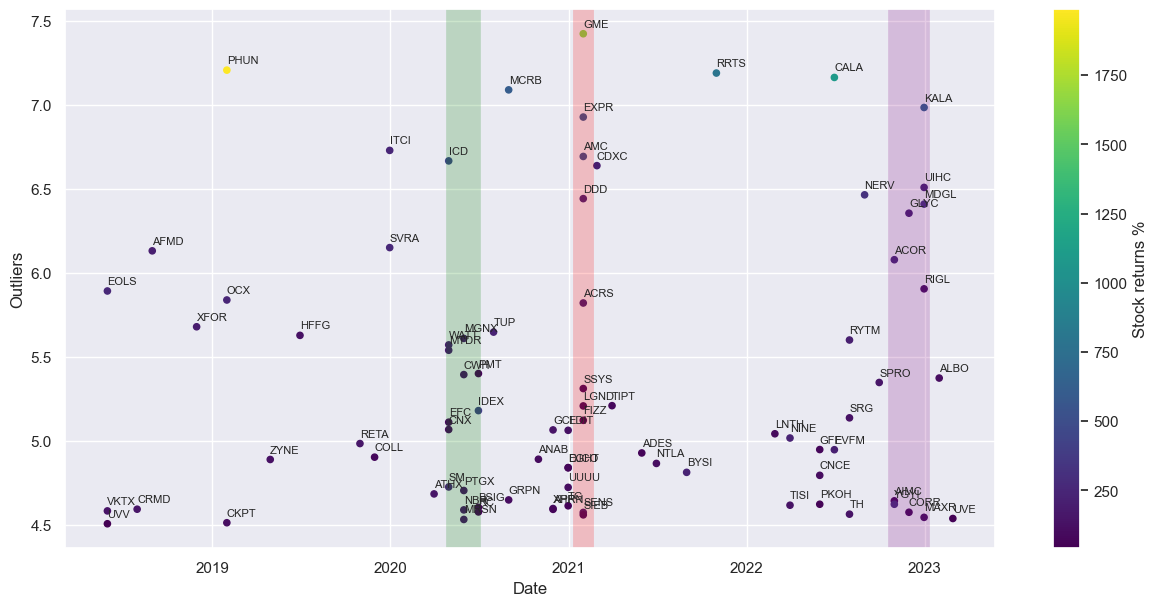

In [72]:
fig, ax = plt.subplots(figsize=(15, 7))
df1_new.plot(ax = ax, x='Actual Date', y='Stand Residual', c = 'Stock returns %', kind='scatter', cmap='viridis')

for i, point in df1_new.iterrows():
    ax.text(point['Actual Date'], point['Stand Residual']+0.04, str(point['index']), size = 8) # 

import datetime as dt
plt.axvline(dt.datetime(2021, 1, 31), lw=15, alpha=0.2, color='red', label="Jan 2021") # memes
plt.axvline(dt.datetime(2020, 5, 30), lw=25, alpha=0.2, color='green', label="April/May 2020") # mid 202 market correction
# plt.axvline(dt.datetime(2019, 2, 20), lw=15, alpha=0.2, color='blue', label="Jan/Feb 2019") # covid
plt.axvline(dt.datetime(2022, 12, 1), lw=30, alpha=0.2, color='purple', label="Nov/Dec 2022") # late 2022 fed rates
#plt.axvline(dt.datetime(2021, 1, 31))
#plt.axvline(dt.datetime(2021, 1, 1))

ax.set_xlabel('Date')
ax.set_ylabel('Outliers')
# ax.set_title('')
# ax.legend(loc = 'lower left')

plt.show()

- Is it reasonable to still use SPY for the 'market portfolio'? Let's compare the Russell 2000 index with the SPY.

In [96]:
# Get the data for the tickers from yahoo finance
#'^RUT' : Russell 2000
#'^RUI': Russell 1000
russell = yf.download(['^RUT','^RUI','SPY'],'2018-03-01','2023-03-01', auto_adjust=True)['Close']

[*********************100%***********************]  3 of 3 completed


In [103]:
russell['SPY*6'] =russell.SPY*6 
russell_new = russell[['SPY*6', '^RUT','^RUI']]

In [98]:
russell_returns = russell[['^RUT','^RUI','SPY']]
russell_returns = russell_returns.pct_change()[1:]
russell_returns.head()

,^RUT,^RUI,SPY
Date,,,
2018-03-02,0.017102,0.005606,0.005155
2018-03-05,0.008401,0.011022,0.011558
2018-03-06,0.010446,0.003165,0.002535
2018-03-07,0.007893,-0.000139,-0.000366
2018-03-08,-0.001626,0.004095,0.004839


(18262.0, 19507.25)

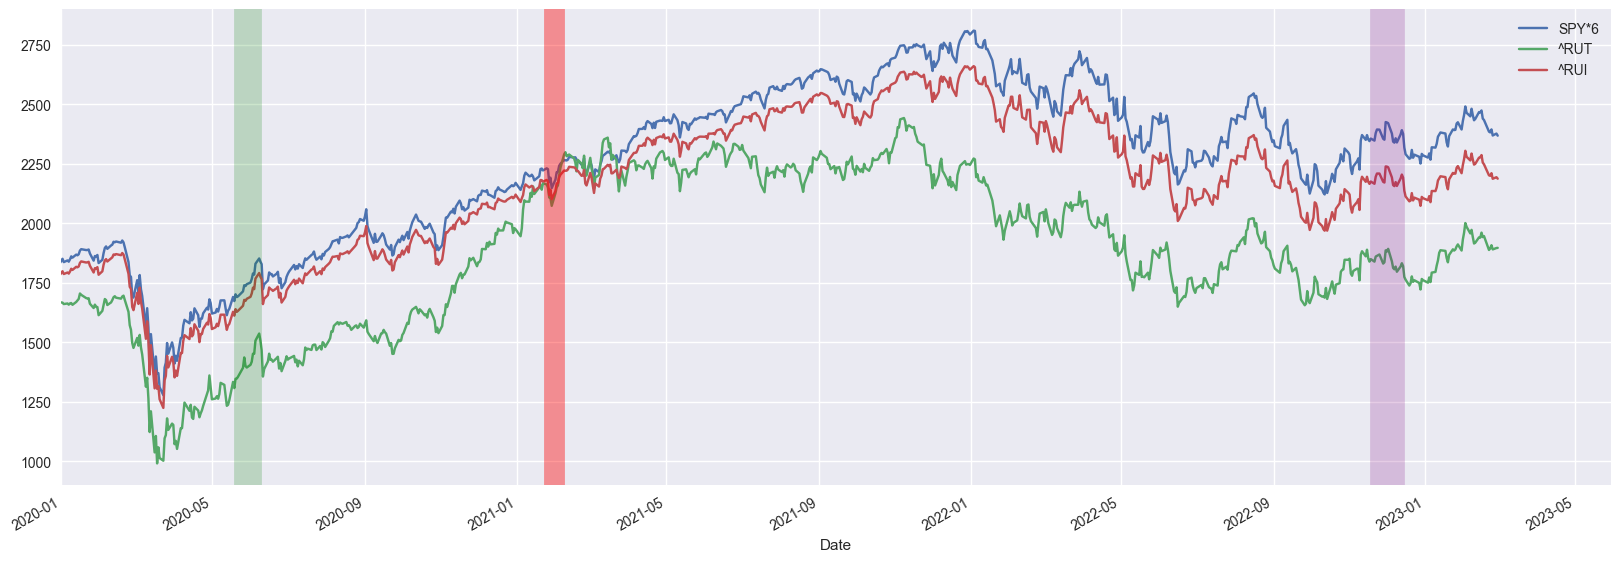

In [109]:
# Scatter plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,7))  

russell_new.plot(ax=ax)

ax.axvline(dt.datetime(2021, 1, 31), lw=15, alpha=0.4, color='red', label="Jan 2021") # memes
ax.axvline(dt.datetime(2020, 5, 30), lw=20, alpha=0.2, color='green', label="April/May 2020") # mid 202 market correction
# plt.axvline(dt.datetime(2019, 2, 20), lw=15, alpha=0.2, color='blue', label="Jan/Feb 2019") # covid
ax.axvline(dt.datetime(2022, 12, 1), lw=25, alpha=0.2, color='purple', label="Nov/Dec 2022") # late 2022 fed rates
ax.set_xlim(left = dt.datetime(2020, 1, 1))

#russell_returns.plot(ax=ax[1])

Text(0.5, 1.0, 'S&P 500 returns')

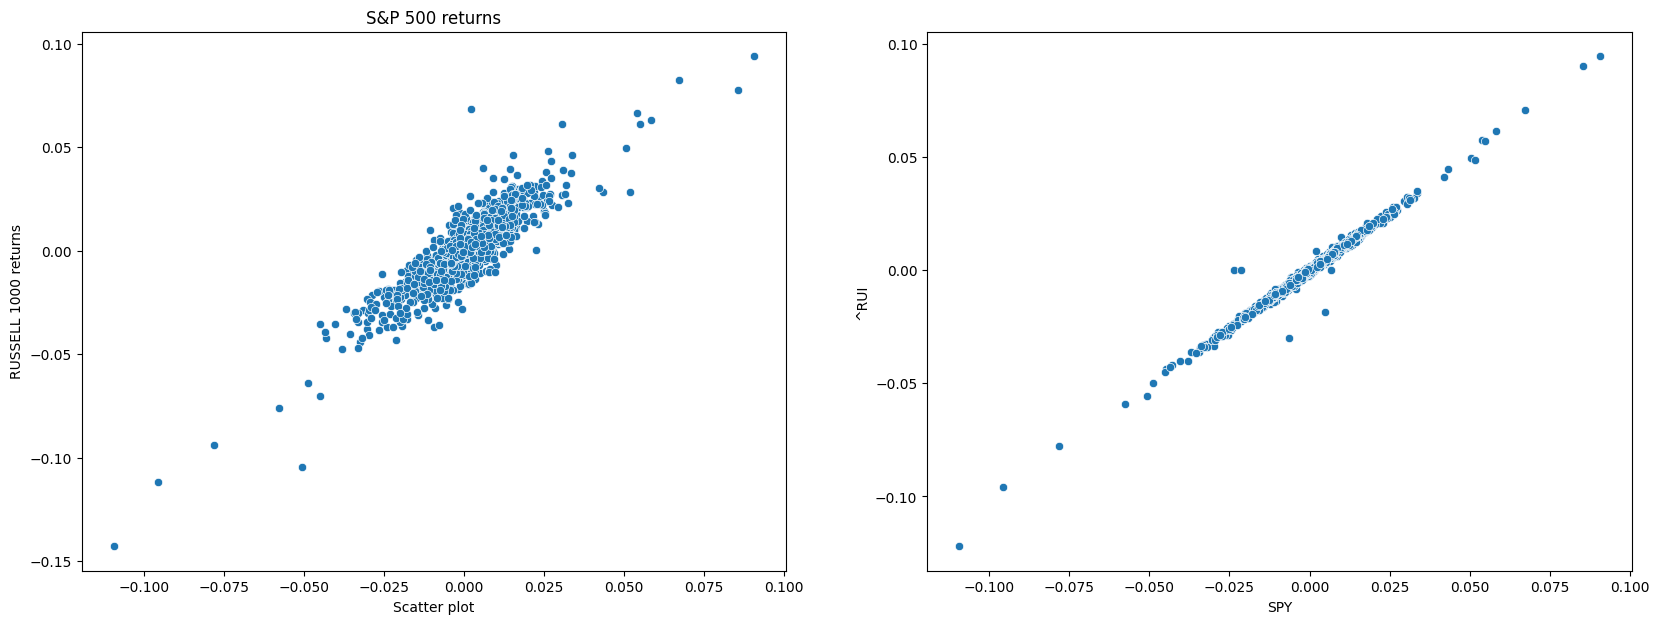

In [37]:
# Scatter plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

sns.scatterplot(x=russell_returns['SPY'], y=russell_returns['^RUT'], ax=ax[0])
ax[0].set_xlabel('Scatter plot')
ax[0].set_ylabel('RUSSELL 2000 returns')
ax[0].set_title('S&P 500 returns')

sns.scatterplot(x=russell_returns['SPY'], y=russell_returns['^RUI'], ax=ax[1])
ax[0].set_xlabel('Scatter plot')
ax[0].set_ylabel('RUSSELL 1000 returns')
ax[0].set_title('S&P 500 returns')

In [39]:
X1, Y1 = russell_returns['SPY'], russell_returns['^RUT']
X1_c = sm.add_constant(X1)
result = sm.OLS(Y1, X1_c).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ^RUT   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     4731.
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:43:46   Log-Likelihood:                 4314.8
No. Observations:                1257   AIC:                            -8626.
Df Residuals:                    1255   BIC:                            -8615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.906      0.365      -0.001       0.000
SPY            1.1239      0.016     68.780      0.000       1.092       1.156
==============================================================================
Omnibus:                      183.449   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1694.357
Skew:                           0.345   Prob(JB):                         0.00
Kurtosis:                       8.646   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X1, Y1 = russell_returns['SPY'], russell_returns['^RUI']
X1_c = sm.add_constant(X1)
result = sm.OLS(Y1, X1_c).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ^RUI   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 9.089e+04
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:44:16   Log-Likelihood:                 6295.5
No. Observations:                1257   AIC:                        -1.259e+04
Df Residuals:                    1255   BIC:                        -1.258e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.441e-05   4.57e-05     -1.629      0.103      -0.000    1.52e-05
SPY            1.0190      0.003    301.474      0.000       1.012       1.026
==============================================================================
Omnibus:                      564.929   Durbin-Watson:                   2.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           937962.045
Skew:                          -0.278   Prob(JB):                         0.00
Kurtosis:                     136.822   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""